**Context:** An international e-commerce company based wants to discover key insights from their customer database. They want to use some of the most advanced machine learning techniques to study their customers. The company sells electronic products.

**Feature Description** The dataset used for model building contained 10999 observations of 12 variables. The data contains the following information:

* ID: ID Number of Customers.

* Warehouse block: The Company have big Warehouse which is divided in to block such as A,B,C,D,E.

* Mode of shipment:The Company Ships the products in multiple way such as Ship, Flight and Road.

* Customer care calls: The number of calls made from enquiry for enquiry of the shipment.

* Customer rating: The company has rated from every customer. 1 is the lowest (Worst), 5 is the highest (Best).

* Cost of the product: Cost of the Product in US Dollars.

* Prior purchases: The Number of Prior Purchase.

* Product importance: The company has categorized the product in the various parameter such as low, medium, high.

* Gender: Male and Female.

* Discount offered: Discount offered on that specific product.

* Weight in gms: It is the weight in grams.

* Reached on time: It is the target variable, where 1 Indicates that the product has NOT reached on time and 0 indicates it has reached on time.

**Project Objective¶**

This data of Product Shipment Tracking, answer instantly to your questions:

* What was Customer Rating? And was the product delivered on time?

* Is Customer query is being answered?

* If Product importance is high. having higest rating or being delivered on time?

**Steps to the project:**

**1. Load the dataset:**

* Import data and Explore shape and size.

**2. Data cleansing:**

* Missing value treatment

* Convert categorical attributes to continuous using relevant functional knowledge

* Drop attribute/s if required using relevant functional knowledge

* Automate all the above steps

**3. Data analysis & visualisation:**

* Perform detailed statistical analysis on the data. â¢
* Perform a detailed univariate, bivariate and multivariate analysis with appropriate detailed comments after each analysis.

**4. Data pre-processing:**

* Segregate predictors vs target attributes

* Check for target balancing and fix it if found imbalanced.

* Perform train-test split.

* Check if the train and test data have similar statistical characteristics when compared with original data.

**5. Model training, testing and tuning:**

* Train and test all ensemble models taught in the learning module.

* Display the classification accuracies for train and test data.

* Apply all the possible tuning techniques to train the best model for the given data.

* Display and compare all the models designed with their train and test accuracies.

* Select the final best trained model along with your detailed comments for selecting this model.

* Pickle the selected model for future use.

**6. GUI development:**

* Design a clickable web service application.

* This application should allow the user to input all future values and on a click use these values on the trained model above to predict.

* It should display the prediction.

**7. Conclusion and improvisation:**

* Write your conclusion on the results.

* Detailed suggestions or improvements or on quality, quantity, variety, velocity, veracity etc. on the data points perform a better data analysis in future.

In [142]:
# importing all the libraries in one place
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt       # matplotlib.pyplot plots data
%matplotlib inline 

from sklearn import preprocessing  # for encoding variables
from statsmodels.stats.outliers_influence import variance_inflation_factor  # for calculating VIF


# put these at the top in the end
from sklearn.model_selection import train_test_split
# Importing Library
import sklearn
import matplotlib.pyplot as plt
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from collections import Counter
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import *
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import BernoulliNB, MultinomialNB, GaussianNB
from sklearn import svm #support vector Machine
from sklearn.ensemble import RandomForestClassifier #Random Forest
from sklearn.neighbors import KNeighborsClassifier #KNN
from sklearn.tree import DecisionTreeClassifier #Decision Tree
from sklearn import svm
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import StackingClassifier
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
import tensorflow as tf

from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix
from sklearn.model_selection import KFold #for K-fold cross validation
from sklearn.model_selection import cross_val_score #score evaluation
from sklearn.model_selection import cross_val_predict #prediction
from sklearn.model_selection import GridSearchCV, StratifiedKFold



from sklearn.utils import resample
import sklearn.metrics as metrics
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

from plotnine import *
import plotnine

from itertools import product

**Please organise the libraries**

# 1) Loading the dataset

In [2]:
df = pd.read_csv('product_shipment.csv')  # Loading the dataset onto a variable df

Now that the dataset has been loaded, we explore the dataset to get a 'feel' of the data

In [3]:
df.info()  # basic info of the features

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   10999 non-null  int64 
 1   Warehouse_block      10999 non-null  object
 2   Mode_of_Shipment     10999 non-null  object
 3   Customer_care_calls  10999 non-null  int64 
 4   Customer_rating      10999 non-null  int64 
 5   Cost_of_the_Product  10999 non-null  int64 
 6   Prior_purchases      10999 non-null  int64 
 7   Product_importance   10999 non-null  object
 8   Gender               10999 non-null  object
 9   Discount_offered     10999 non-null  int64 
 10  Weight_in_gms        10999 non-null  int64 
 11  Reached.on.Time_Y.N  10999 non-null  int64 
dtypes: int64(8), object(4)
memory usage: 1.0+ MB


We see that a few of the features are of object type. We might require to change these to int/float in order to perform further statistical analysis.

In [4]:
df.size  # the get the size of the dataset
         # shape can be seen in the above code, 10999*12

131988

In [5]:
df.head(10)  # to see first 10 entries in the dataset

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1
5,6,F,Flight,3,1,162,3,medium,F,12,1417,1
6,7,D,Flight,3,4,250,3,low,F,3,2371,1
7,8,F,Flight,4,1,233,2,low,F,48,2804,1
8,9,A,Flight,3,4,150,3,low,F,11,1861,1
9,10,B,Flight,3,2,164,3,medium,F,29,1187,1


We see that 'Warehouse_block', 'Mode_of_Shipment', 'Gender' are categorical features and 'Product_importance' is an ordinal feature. Thus, we can change them later to facilitate analysis.

# 2) Data cleansing:

In [6]:
df.isnull().any().any()  # To see if there are any null values in the entire dataset

False

Since there are no null values in the dataset, missing value treatment is note required.

We also drop off the feature ID as it just works as index and does not provide any additional information

In [7]:
df.drop(['ID'], axis = 1, inplace = True)  # dropping the ID column

Now, we try to convert the ordinal variable using label encoding, and later explore the categorical variables as the problem is a bit more complex

In [8]:
# label_encoder object knows how to understand word labels. 
label_encoder = preprocessing.LabelEncoder()
# Encode labels in column 'Product_importance'. 
df['Product_importance']= label_encoder.fit_transform(df['Product_importance'])

In [9]:
df.head(10)  # to see first 10 entries in the dataset

,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,D,Flight,4,2,177,3,1,F,44,1233,1
1,F,Flight,4,5,216,2,1,M,59,3088,1
2,A,Flight,2,2,183,4,1,M,48,3374,1
3,B,Flight,3,3,176,4,2,M,10,1177,1
4,C,Flight,2,2,184,3,2,F,46,2484,1
5,F,Flight,3,1,162,3,2,F,12,1417,1
6,D,Flight,3,4,250,3,1,F,3,2371,1
7,F,Flight,4,1,233,2,1,F,48,2804,1
8,A,Flight,3,4,150,3,1,F,11,1861,1
9,B,Flight,3,2,164,3,2,F,29,1187,1


In [10]:
df.info()  # verifying

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Warehouse_block      10999 non-null  object
 1   Mode_of_Shipment     10999 non-null  object
 2   Customer_care_calls  10999 non-null  int64 
 3   Customer_rating      10999 non-null  int64 
 4   Cost_of_the_Product  10999 non-null  int64 
 5   Prior_purchases      10999 non-null  int64 
 6   Product_importance   10999 non-null  int32 
 7   Gender               10999 non-null  object
 8   Discount_offered     10999 non-null  int64 
 9   Weight_in_gms        10999 non-null  int64 
 10  Reached.on.Time_Y.N  10999 non-null  int64 
dtypes: int32(1), int64(7), object(3)
memory usage: 902.4+ KB


We can see that the importance have been encoded as 1,2,3 for low, medium, high and datatype has changed successfully

## (i) One-Hot Encoding:

Now, we should try to convert the categorical variables using one-hot encoding, but if the number of categories are too many, then it might result in very high multicollinearity which would affect the performance of linear models significantly and our dataset would also lose the assumption of independent features.
Before proceeding further, we must copy the dataset.

In [11]:
df_onehot=df.copy(deep=True)

In [12]:
# Creating dummy features for the encoding
df_onehot = pd.get_dummies(df_onehot, columns=['Gender', 'Mode_of_Shipment', 'Warehouse_block'])
# verifying
df_onehot.head(10)

,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N,Gender_F,Gender_M,Mode_of_Shipment_Flight,Mode_of_Shipment_Road,Mode_of_Shipment_Ship,Warehouse_block_A,Warehouse_block_B,Warehouse_block_C,Warehouse_block_D,Warehouse_block_F
0,4,2,177,3,1,44,1233,1,1,0,1,0,0,0,0,0,1,0
1,4,5,216,2,1,59,3088,1,0,1,1,0,0,0,0,0,0,1
2,2,2,183,4,1,48,3374,1,0,1,1,0,0,1,0,0,0,0
3,3,3,176,4,2,10,1177,1,0,1,1,0,0,0,1,0,0,0
4,2,2,184,3,2,46,2484,1,1,0,1,0,0,0,0,1,0,0
5,3,1,162,3,2,12,1417,1,1,0,1,0,0,0,0,0,0,1
6,3,4,250,3,1,3,2371,1,1,0,1,0,0,0,0,0,1,0
7,4,1,233,2,1,48,2804,1,1,0,1,0,0,0,0,0,0,1
8,3,4,150,3,1,11,1861,1,1,0,1,0,0,1,0,0,0,0
9,3,2,164,3,2,29,1187,1,1,0,1,0,0,0,1,0,0,0


In [13]:
df_onehot.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   Customer_care_calls      10999 non-null  int64
 1   Customer_rating          10999 non-null  int64
 2   Cost_of_the_Product      10999 non-null  int64
 3   Prior_purchases          10999 non-null  int64
 4   Product_importance       10999 non-null  int32
 5   Discount_offered         10999 non-null  int64
 6   Weight_in_gms            10999 non-null  int64
 7   Reached.on.Time_Y.N      10999 non-null  int64
 8   Gender_F                 10999 non-null  uint8
 9   Gender_M                 10999 non-null  uint8
 10  Mode_of_Shipment_Flight  10999 non-null  uint8
 11  Mode_of_Shipment_Road    10999 non-null  uint8
 12  Mode_of_Shipment_Ship    10999 non-null  uint8
 13  Warehouse_block_A        10999 non-null  uint8
 14  Warehouse_block_B        10999 non-null  uint8
 15  Wa

One-Hot Encoding results in a Dummy Variable Trap as the outcome of one variable can easily be predicted with the help of the remaining variables. This results in multicollinearity.

We use Variance Inflation Factor(VIF) to analyse multicollinearity.

* VIF=1, Very Less Multicollinearity
* VIF<5, Moderate Multicollinearity
* VIF>5, Extreme Multicollinearity (This is what we have to avoid)

We check VIF only in the independent variables so we must drop the target variable for now

In [14]:
# the set of categorical variables
X = df_onehot.drop(['Reached.on.Time_Y.N'], axis = 1)
  
# VIF dataframe
vif_data = pd.DataFrame()
vif_data["Variable"] = X.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]
vif_data

F:\Anaconda\envs\deeplearning\lib\site-packages\statsmodels\stats\outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars


,Variable,VIF
0,Customer_care_calls,1.260807
1,Customer_rating,1.000500
2,Cost_of_the_Product,1.144838
3,Prior_purchases,1.070703
4,Product_importance,1.000885
5,Discount_offered,1.295057
6,Weight_in_gms,1.383377
7,Gender_F,inf
8,Gender_M,inf
9,Mode_of_Shipment_Flight,inf


We see that VIF for some variables is as high as infinity. Eg: Gender_F can completely predict Gender_M. Therefore, we must drop one dummy feature per conversion and see if that is feasible.

In [15]:
#dropping 'Gender_F', 'Mode_of_Shipment_Flight', 'Warehouse_block_A'  
df_dropped = df_onehot.drop(df_onehot.columns[[8,10,13]], axis = 1)  

In [16]:
df_dropped.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   Customer_care_calls    10999 non-null  int64
 1   Customer_rating        10999 non-null  int64
 2   Cost_of_the_Product    10999 non-null  int64
 3   Prior_purchases        10999 non-null  int64
 4   Product_importance     10999 non-null  int32
 5   Discount_offered       10999 non-null  int64
 6   Weight_in_gms          10999 non-null  int64
 7   Reached.on.Time_Y.N    10999 non-null  int64
 8   Gender_M               10999 non-null  uint8
 9   Mode_of_Shipment_Road  10999 non-null  uint8
 10  Mode_of_Shipment_Ship  10999 non-null  uint8
 11  Warehouse_block_B      10999 non-null  uint8
 12  Warehouse_block_C      10999 non-null  uint8
 13  Warehouse_block_D      10999 non-null  uint8
 14  Warehouse_block_F      10999 non-null  uint8
dtypes: int32(1), int64(7), uint8(7)
memo

In [17]:
# the set of categorical variables
X_dropped = df_dropped.drop(['Reached.on.Time_Y.N'], axis = 1)
  
# VIF dataframe
vif_data = pd.DataFrame()
vif_data["Variable"] = X_dropped.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X_dropped.values, i)
                          for i in range(len(X_dropped.columns))]
vif_data

,Variable,VIF
0,Customer_care_calls,14.281482
1,Customer_rating,5.190082
2,Cost_of_the_Product,18.589566
3,Prior_purchases,6.426294
4,Product_importance,5.234916
5,Discount_offered,1.754516
6,Weight_in_gms,5.460389
7,Gender_M,1.959157
8,Mode_of_Shipment_Road,1.908285
9,Mode_of_Shipment_Ship,4.850386


We see that after dropping a dummy column per feature, the VIF for the dummy columns has become moderate and would not significanty affect linearity, thus we can proceed further.

Also make a note tha the VIF for features 'Customer_care_calls' and 'Cost_of_the_Product' is exceptionally high, implying they provide very less new information in exchange for the increased dimensionality. We iteratively drop the features with highest VIF(>10) and store the dataset as df_reduced.

But the problem with dropping a feature is that we lose on information. So before dropping this, we convert the discount percentage to absolute values, which would help retain some information about the Cost before dropping the feature due to its high VIF.

In [18]:
df_reduced = df_dropped.copy(deep=True)

In [19]:
df_reduced['Actual_Discount'] = df_reduced['Discount_offered']*df_reduced['Cost_of_the_Product']

In [20]:
# the set of categorical variables
X_dropped = df_reduced.drop(['Reached.on.Time_Y.N', 'Cost_of_the_Product', 'Discount_offered'], axis = 1)
  
# VIF dataframe
vif_data = pd.DataFrame()
vif_data["Variable"] = X_dropped.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X_dropped.values, i)
                          for i in range(len(X_dropped.columns))]
vif_data

,Variable,VIF
0,Customer_care_calls,10.239642
1,Customer_rating,5.095505
2,Prior_purchases,6.181373
3,Product_importance,5.132647
4,Weight_in_gms,5.109666
5,Gender_M,1.945696
6,Mode_of_Shipment_Road,1.877807
7,Mode_of_Shipment_Ship,4.715558
8,Warehouse_block_B,1.904413
9,Warehouse_block_C,1.907129


We see that the VIF for Customer_care_calls was also significantly reduced and got close to our threshold and **all** the others were reduced marginally. This would increase performance of models with assumption of independence. To be thorough, We create two datasets; one now, and one after removing another feature.

In [21]:
df_reduced = df_reduced.drop(['Cost_of_the_Product', 'Discount_offered'], axis = 1)
df_reduced.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   Customer_care_calls    10999 non-null  int64
 1   Customer_rating        10999 non-null  int64
 2   Prior_purchases        10999 non-null  int64
 3   Product_importance     10999 non-null  int32
 4   Weight_in_gms          10999 non-null  int64
 5   Reached.on.Time_Y.N    10999 non-null  int64
 6   Gender_M               10999 non-null  uint8
 7   Mode_of_Shipment_Road  10999 non-null  uint8
 8   Mode_of_Shipment_Ship  10999 non-null  uint8
 9   Warehouse_block_B      10999 non-null  uint8
 10  Warehouse_block_C      10999 non-null  uint8
 11  Warehouse_block_D      10999 non-null  uint8
 12  Warehouse_block_F      10999 non-null  uint8
 13  Actual_Discount        10999 non-null  int64
dtypes: int32(1), int64(6), uint8(7)
memory usage: 633.9 KB


In [22]:
# the set of categorical variables
X_dropped = df_reduced.drop(['Reached.on.Time_Y.N', 'Customer_care_calls'], axis = 1)
  
# VIF dataframe
vif_data = pd.DataFrame()
vif_data["Variable"] = X_dropped.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X_dropped.values, i)
                          for i in range(len(X_dropped.columns))]
vif_data

,Variable,VIF
0,Customer_rating,4.866311
1,Prior_purchases,5.188181
2,Product_importance,4.898027
3,Weight_in_gms,5.093792
4,Gender_M,1.923513
5,Mode_of_Shipment_Road,1.826526
6,Mode_of_Shipment_Ship,4.513344
7,Warehouse_block_B,1.856040
8,Warehouse_block_C,1.849572
9,Warehouse_block_D,1.852540


In [23]:
df_redduced = df_reduced.drop(['Customer_care_calls'], axis = 1)
df_redduced.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   Customer_rating        10999 non-null  int64
 1   Prior_purchases        10999 non-null  int64
 2   Product_importance     10999 non-null  int32
 3   Weight_in_gms          10999 non-null  int64
 4   Reached.on.Time_Y.N    10999 non-null  int64
 5   Gender_M               10999 non-null  uint8
 6   Mode_of_Shipment_Road  10999 non-null  uint8
 7   Mode_of_Shipment_Ship  10999 non-null  uint8
 8   Warehouse_block_B      10999 non-null  uint8
 9   Warehouse_block_C      10999 non-null  uint8
 10  Warehouse_block_D      10999 non-null  uint8
 11  Warehouse_block_F      10999 non-null  uint8
 12  Actual_Discount        10999 non-null  int64
dtypes: int32(1), int64(5), uint8(7)
memory usage: 547.9 KB


## (ii) Label-Encoding:

Now, we usually do not use label encoding for categorical data as it implies certain relations between the encoding which the models might learn. But certain models such as those based on Decision Trees are unaffected by this, so Label encoding should be tried as it has lower dimensionality than One-Hot Encoding. We still keep one-hot encoding as our default but we store this dataset for further experimentation.

In [24]:
df_label = df.copy(deep=True)

In [25]:
df_label['Gender']= label_encoder.fit_transform(df_label['Gender'])
df_label['Mode_of_Shipment']= label_encoder.fit_transform(df_label['Mode_of_Shipment'])
df_label['Warehouse_block']= label_encoder.fit_transform(df_label['Warehouse_block'])

In [26]:
df_label.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Warehouse_block      10999 non-null  int32
 1   Mode_of_Shipment     10999 non-null  int32
 2   Customer_care_calls  10999 non-null  int64
 3   Customer_rating      10999 non-null  int64
 4   Cost_of_the_Product  10999 non-null  int64
 5   Prior_purchases      10999 non-null  int64
 6   Product_importance   10999 non-null  int32
 7   Gender               10999 non-null  int32
 8   Discount_offered     10999 non-null  int64
 9   Weight_in_gms        10999 non-null  int64
 10  Reached.on.Time_Y.N  10999 non-null  int64
dtypes: int32(4), int64(7)
memory usage: 773.5 KB


In [27]:
df_label.sample(10)

,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
682,2,0,4,4,143,2,2,1,58,1038,1
9185,4,0,7,1,287,4,2,1,9,1150,1
9033,1,1,3,1,242,4,1,1,10,4809,1
8976,3,2,3,2,233,3,2,1,7,5838,0
1081,4,1,6,3,270,3,1,0,56,3251,1
9448,2,0,4,2,223,6,1,0,10,1650,1
1666,2,2,4,5,268,3,1,0,59,2083,1
839,4,2,5,2,151,6,2,1,12,1920,1
2417,4,2,3,4,228,2,2,1,65,3943,1
4889,4,2,5,5,232,3,1,0,2,4545,1


Looks Good!

# 3) Data analysis, Visualisation & Feature Engineering:

## (i) Univariate Analysis:

Let us look at the distribution of data in all the columns of the dataset by visualising the count

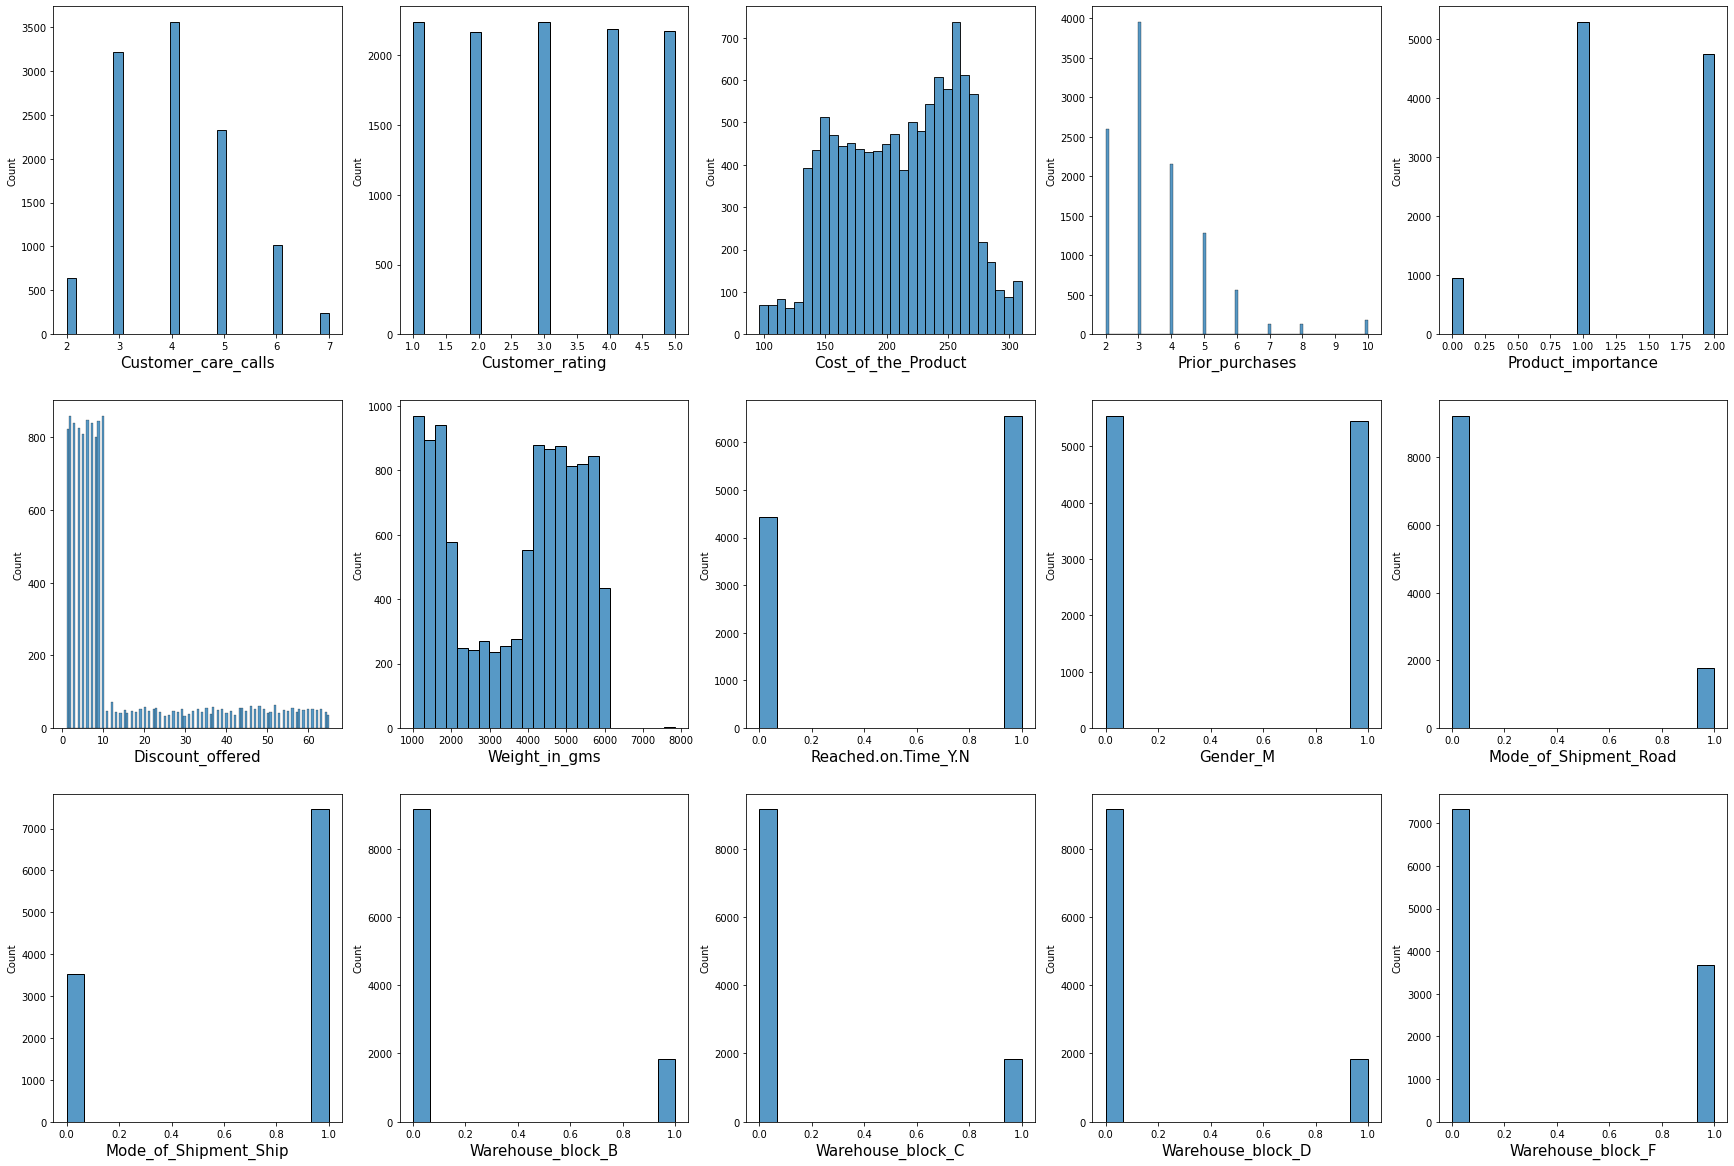

In [28]:
# Let's see how the data is distributed for every column

plt.figure(figsize=(30,35), facecolor = "white")
plotnumber = 1

for column in df_dropped:
    if plotnumber <=16:    #as total number of columns are 16
        ax = plt.subplot(5,5,plotnumber)
        sns.histplot(df_dropped[column])
        plt.xlabel(column, fontsize = 15)
    plotnumber+=1
plt.show()

Let us note down some important inferences obtained from the distributions:

1) Although most Customers are relatively new(i.e have only a few purchases), there are no new customers

2) Presence of outliers in features such as 'Discount_offered', 'Weight_in_gms' etc. suggests that using minmanx scaler would      not be feasible as most of the data would be scaled very close to zero. This has been visualised below.

3) We see that the Customer_care_calls, Cost_of_the_Product are somewhat Normally Distributed, so we use StandardScaler for these and MinMax Scaler for the rest.

Apart from this, some general observations are:
    
* Most customers call customer care 3-4 times.
* More Higher costing products are offered.
* There are fewer low importance products
* More than half of the products are shipped using a Ship
* Most of the products are shipped from Warehouse_block_F

<AxesSubplot:ylabel='Discount_offered'>

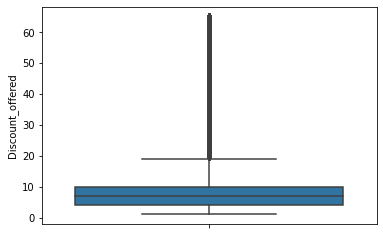

In [29]:
# visualising the outliers in Discounts
sns.boxplot(data = df_dropped, y = 'Discount_offered')

<AxesSubplot:ylabel='Weight_in_gms'>

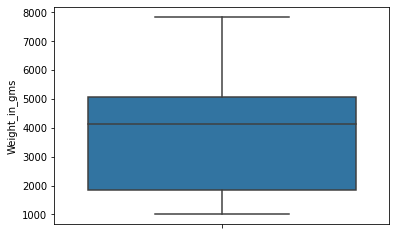

In [30]:
# visualising the outliers in Weight
sns.boxplot(data = df_dropped, y = 'Weight_in_gms')

Now that we have looked at the features individually, let us try to look at their relation with each other

## (ii) Bivariate Analysis:

Let us start with the correlations and visualise it

In [31]:
df_dropped.corr()

,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N,Gender_M,Mode_of_Shipment_Road,Mode_of_Shipment_Ship,Warehouse_block_B,Warehouse_block_C,Warehouse_block_D,Warehouse_block_F
Customer_care_calls,1.000000,0.012209,0.323182,0.180771,0.006273,-0.130750,-0.276615,-0.067126,0.002545,0.003292,-0.017629,-0.013428,0.004099,-0.000401,0.012732
Customer_rating,0.012209,1.000000,0.009270,0.013179,0.003157,-0.003124,-0.001897,0.013119,0.002775,0.001516,0.000765,-0.003222,0.001093,0.008687,0.003092
Cost_of_the_Product,0.323182,0.009270,1.000000,0.123676,0.006366,-0.138312,-0.132604,-0.073587,0.019759,0.002531,0.004419,0.018260,0.009255,0.006618,-0.016472
Prior_purchases,0.180771,0.013179,0.123676,1.000000,0.003662,-0.082769,-0.168213,-0.055515,-0.009395,0.003913,-0.002864,0.002178,-0.003750,0.010095,-0.009095
Product_importance,0.006273,0.003157,0.006366,0.003662,1.000000,-0.006251,0.001652,-0.023483,-0.009865,-0.008647,0.007372,0.019986,-0.004357,-0.006035,0.004719
Discount_offered,-0.130750,-0.003124,-0.138312,-0.082769,-0.006251,1.000000,-0.376067,0.397108,-0.011777,-0.007787,0.010643,-0.005135,0.000736,-0.007714,0.012864
Weight_in_gms,-0.276615,-0.001897,-0.132604,-0.168213,0.001652,-0.376067,1.000000,-0.268793,0.003573,0.004146,-0.002273,0.000461,0.002000,-0.001414,0.003187
Reached.on.Time_Y.N,-0.067126,0.013119,-0.073587,-0.055515,-0.023483,0.397108,-0.268793,1.000000,0.004689,-0.007671,0.002577,0.005106,0.000132,0.000830,0.002568
Gender_M,0.002545,0.002775,0.019759,-0.009395,-0.009865,-0.011777,0.003573,0.004689,1.000000,-0.010277,-0.005112,0.007847,0.001504,-0.004104,-0.002637
Mode_of_Shipment_Road,0.003292,0.001516,0.002531,0.003913,-0.008647,-0.007787,0.004146,-0.007671,-0.010277,1.000000,-0.633948,0.000461,0.000461,-0.000976,-0.000323


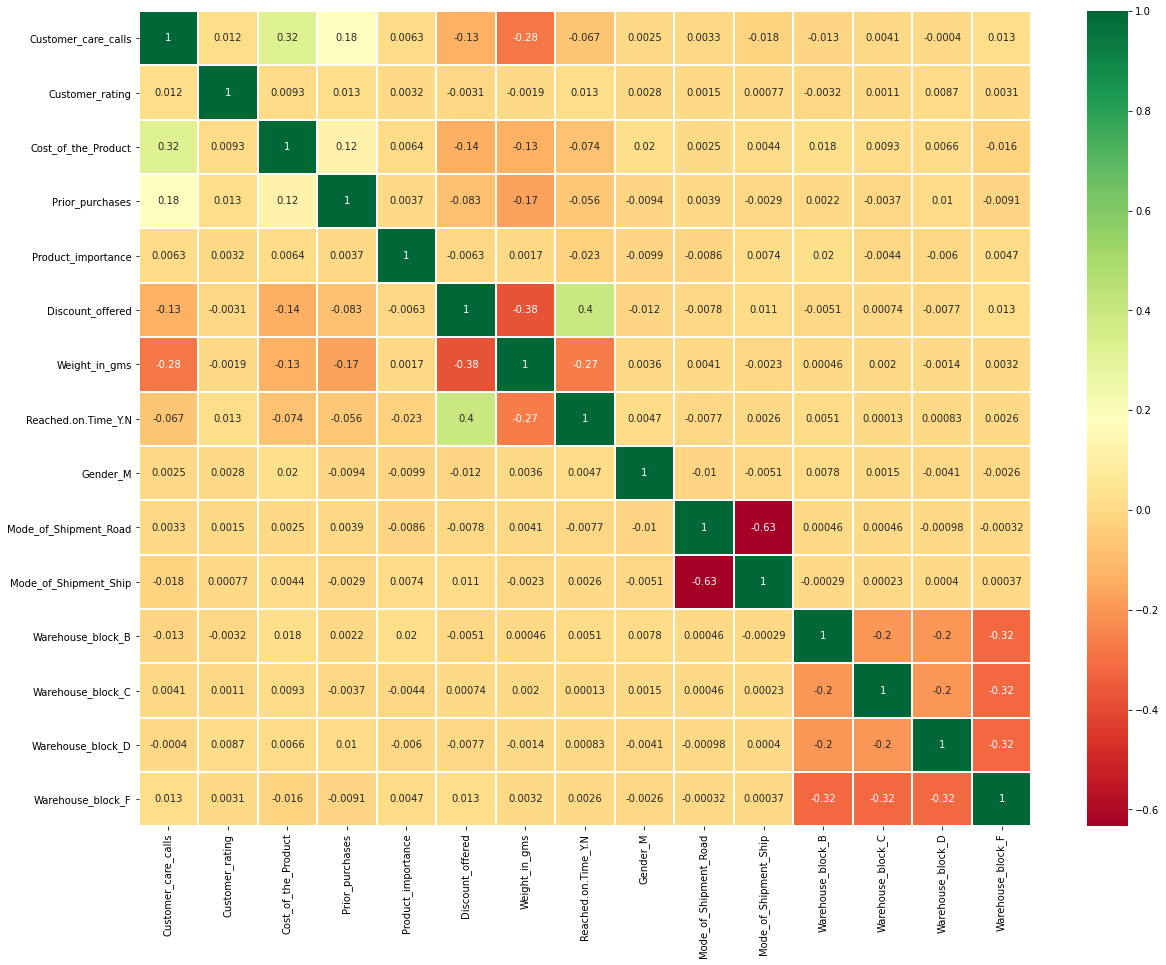

In [32]:
# Visualizing correlation using a heatmap
# FInding the correlation Matrix for all the features and visualizing it
sns.heatmap(df_dropped.corr(),annot=True,cmap='RdYlGn',linewidths=0.2)
fig=plt.gcf()
fig.set_size_inches(20,15)
plt.show()

Let us make some inferences from the heatmap:

1) Most of the feature pairs have near zero correlation which indicates independence, thus models with that assumption should    be tried (Linear models, NB etc.) (|corr|<0.3).

2) There is a weak negative correlation(0.3<|corr|<0.7) between 'Discount_offered' and 'Weight_in_gms' i.e lighter products are sometimes offered more discount.

3) Similarly for 'Cost_of_the_product' and 'Customer_care_calls', people tend to call more for costlier products.

4) Similarly, Discounted products tend to not arrive on time. Interesting :)

Apart from there, there are weak correlations between the dummy variables created out of the categorical ones. This is to be expected.

Let us now visualise these inference:-

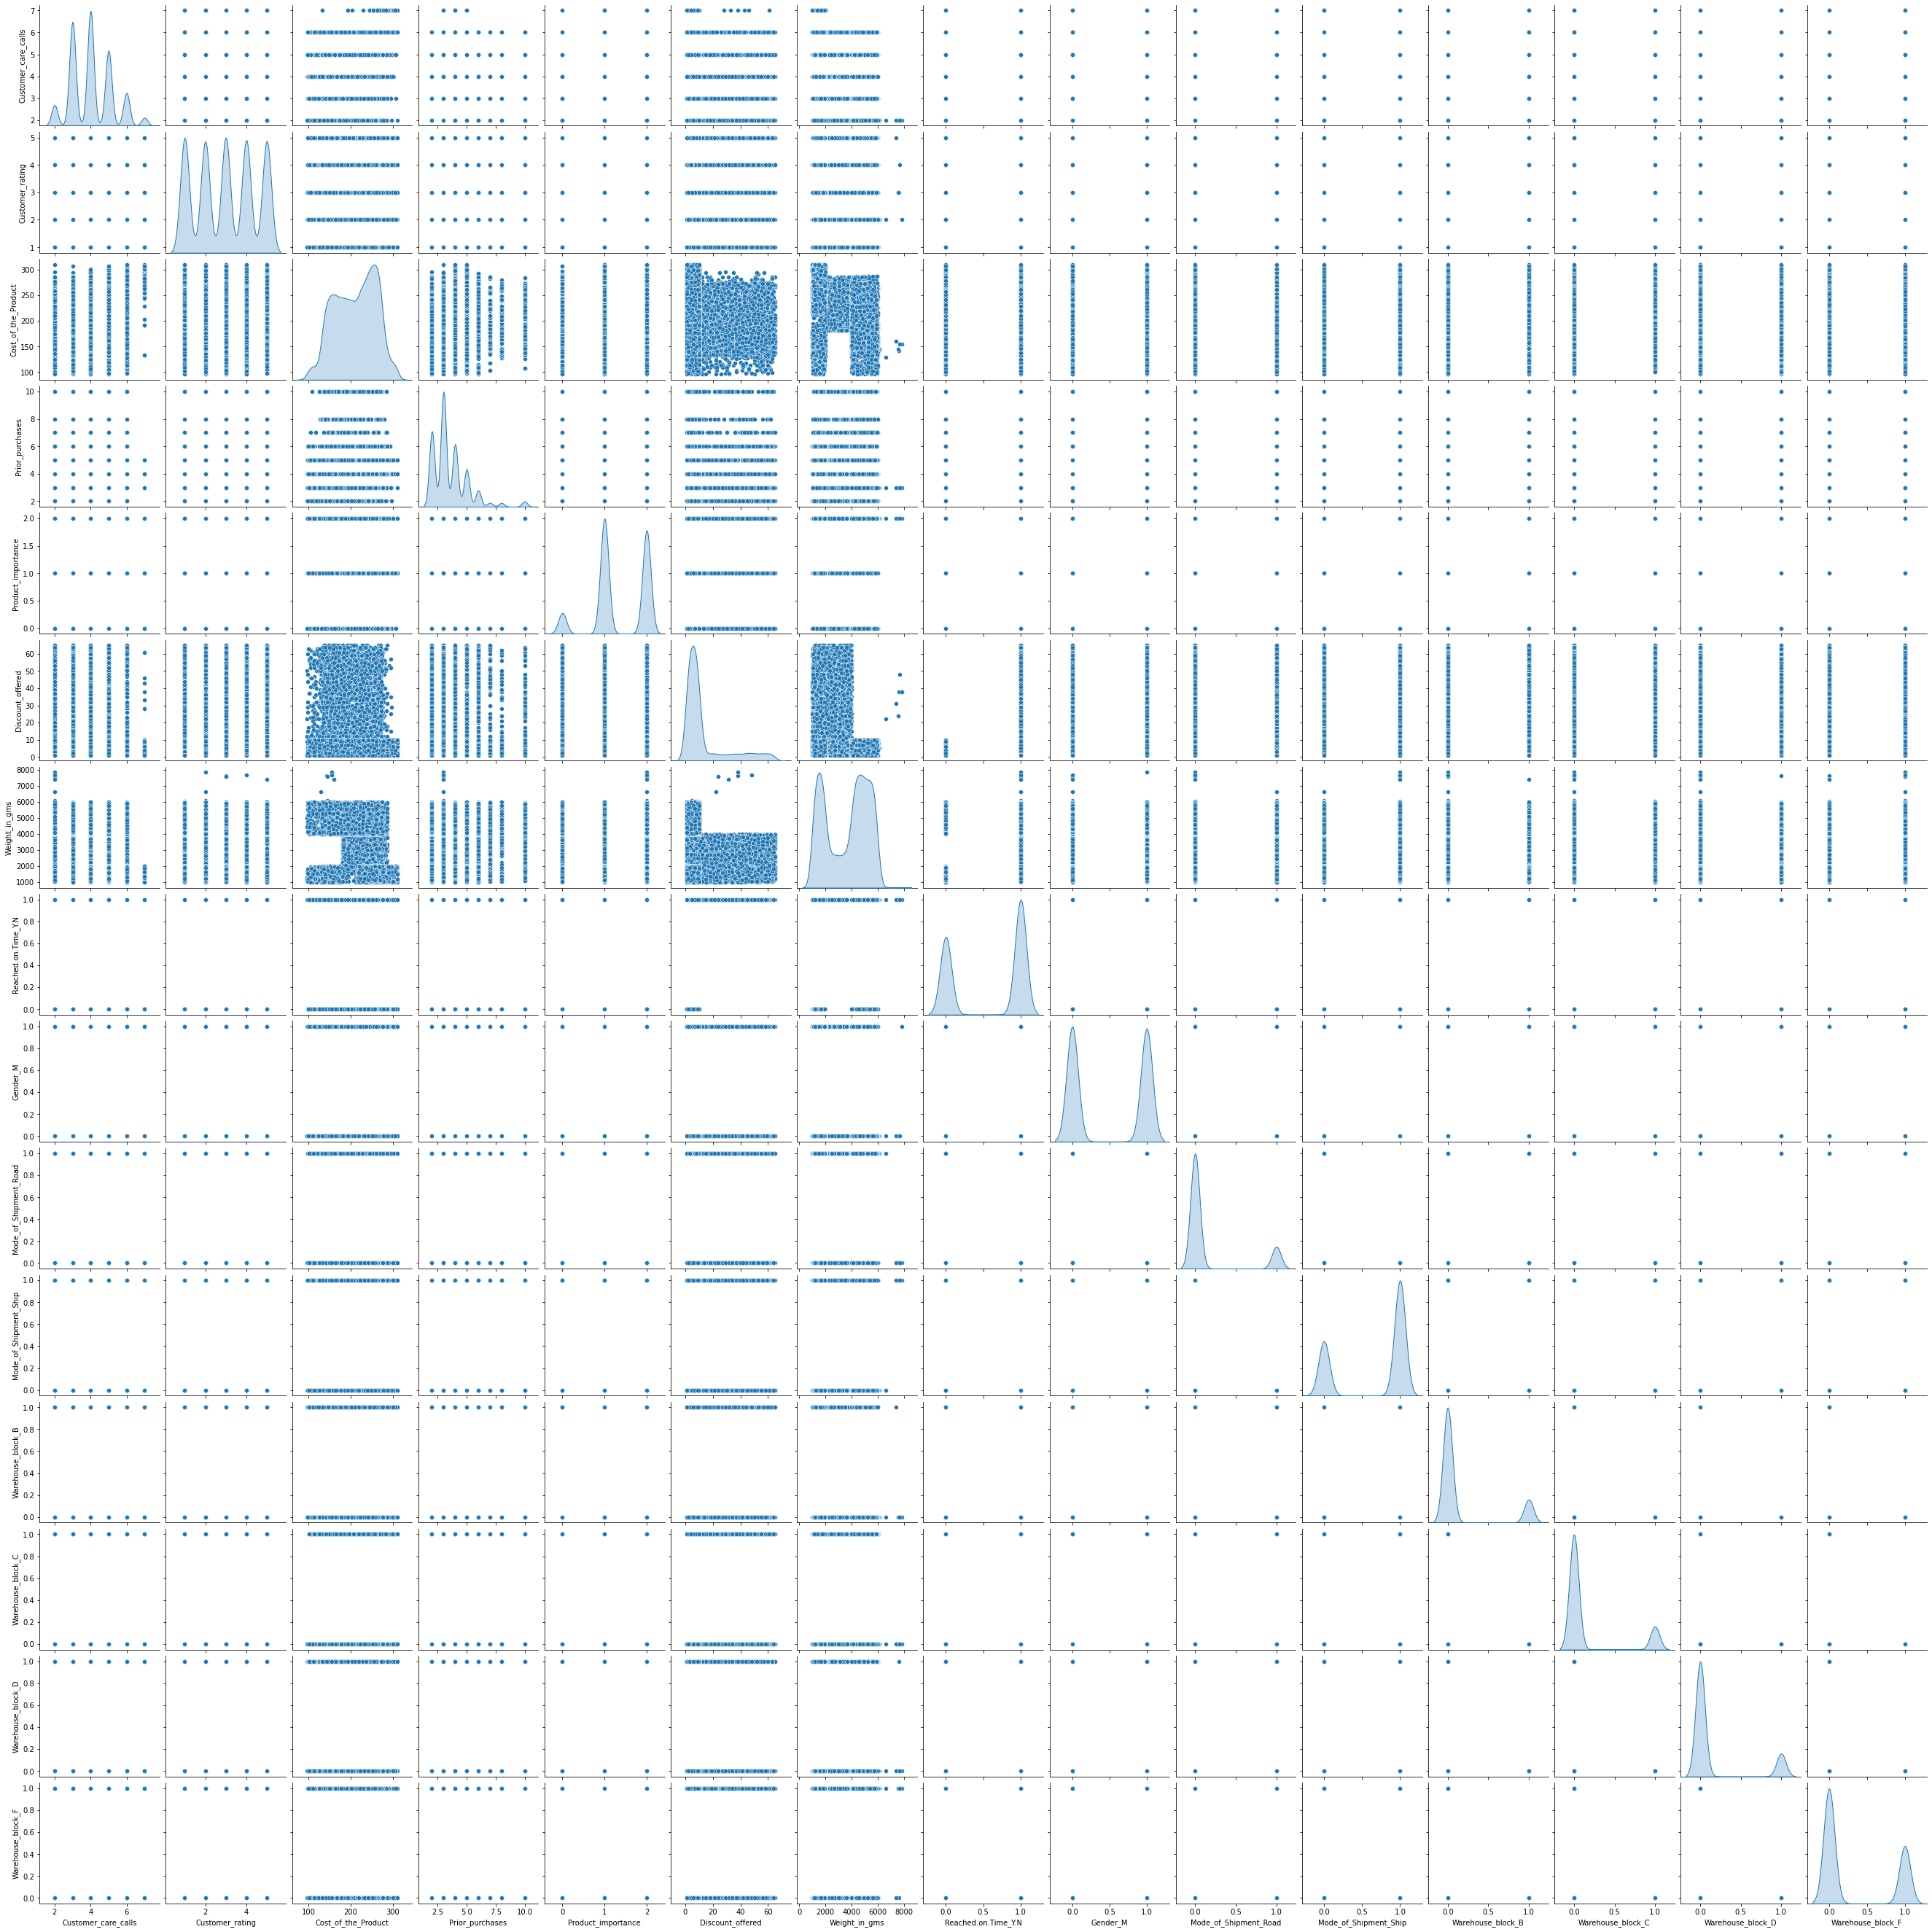

In [33]:
sns.pairplot(df_dropped,diag_kind='kde')

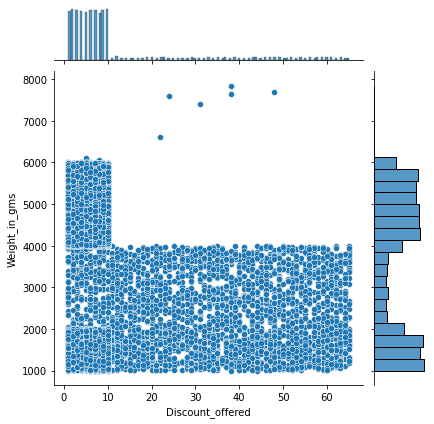

In [34]:
# Visualising the relation of Discount and Weight
sns.jointplot(data = df_dropped, x = 'Discount_offered', y = 'Weight_in_gms')

This is interesting. When investigated further, we see that there is no relation between most of the points, but we see that heavier products are only offered less discount(except for nominal outliers)

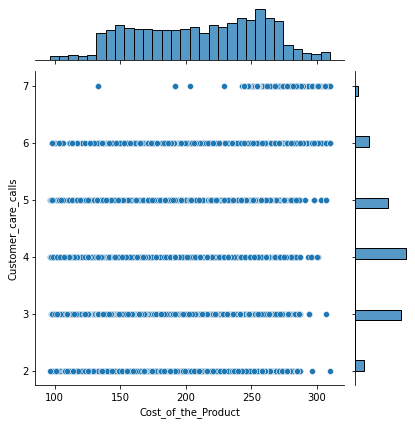

In [35]:
# Visualising the relation of Cost and Customer care calls
sns.jointplot(data = df_dropped, x = 'Cost_of_the_Product', y = 'Customer_care_calls')

Again, we gain deeper insight in the distribution. We see that most of the data is unrelated, but 7 calls are made mostly for very costly products only.

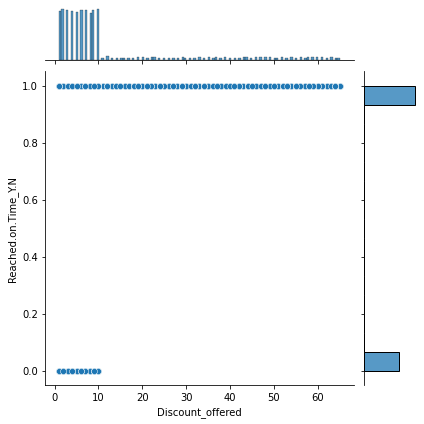

In [36]:
# Visualising the relation of Cost and Customer care calls
sns.jointplot(data = df_dropped, x = 'Discount_offered', y = 'Reached.on.Time_Y.N')

Here we see that **all** the products that reach on time have very less discount offered. This is a phenomenal insight, let us validate it.

In [37]:
temp = (df_dropped[df['Discount_offered']>10]) 
temp[temp['Reached.on.Time_Y.N'] == 0]

,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N,Gender_M,Mode_of_Shipment_Road,Mode_of_Shipment_Ship,Warehouse_block_B,Warehouse_block_C,Warehouse_block_D,Warehouse_block_F


We verify that there are absolutely no products having dicount more than 10% which were delivered on time.

Let us now move on to multivariate analysis and try to answer some more questions-

## (iii) Multi-variate Analysis and Advanced Inferences

Let us try to answer questions such as:

**a) What was Customer Rating? And was the product delivered on time?**

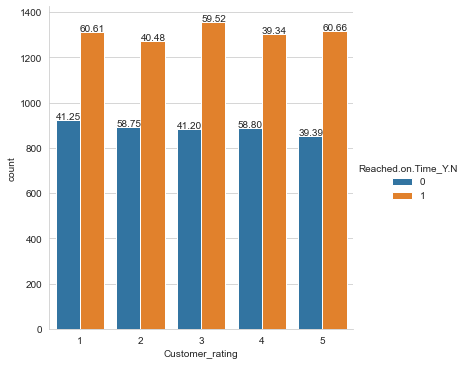

In [153]:
ctplot = sns.catplot( data = df_dropped, kind='count', x = 'Customer_rating', hue = 'Reached.on.Time_Y.N')

bar_order = product([1,2,3,4,5],[0,1])

spots = zip(ctplot.ax.patches, bar_order)
for spot in spots:
    class_total = len(df_dropped[df_dropped['Customer_rating']==spot[1][0]])
    class_who_total = len(df_dropped[(df_dropped['Customer_rating']==spot[1][0]) & 
        (df_dropped['Reached.on.Time_Y.N']==spot[1][1])])
    height = spot[0].get_height() 
    ctplot.ax.text(spot[0].get_x(), height+3, '{:1.2f}'.format(class_who_total/class_total*100))

Let us look at the ratio of (reached on time)/(not reached on time) so we can compare this relationship quantitatively as well.

In [39]:
# function to calculate ratio of on-time arrival to total arrivals
def ratio_time(data):
    arrival_numer = (data[data['Reached.on.Time_Y.N']==0].count(axis = 1).count())
    arrival_denom = arrival_numer + (data[data['Reached.on.Time_Y.N']==1].count(axis = 1).count())
    arrival_ratio = arrival_numer/arrival_denom
    return arrival_ratio

In [40]:
# Ratio in the complete dataset
ratio_time(df_dropped)

0.40330939176288755

In [41]:
# Ratio for different ratings
a = df_dropped['Customer_rating'].unique()
a.sort()
for i in a:
    arrival_i_rated = df_dropped[df_dropped['Customer_rating'] == i]
    print("The ratio when i =", i, "is", ratio_time(arrival_i_rated))

The ratio when i = 1 is 0.41252796420581656
The ratio when i = 2 is 0.4120092378752887
The ratio when i = 3 is 0.3939258597588209
The ratio when i = 4 is 0.4047510278666058
The ratio when i = 5 is 0.3933671119299862


Answer: Looking at the plot and the correlation heatmap from (ii), we can conlude that there is no noteworthy relationship between customer rating and arrival on time. But the ratios tell us that there is a small relation i.e higher rated products arrive on time less often.

**b) Is Customer query is being answered?**

This can be interpreted as, Do customers who enquire more get their delivery on time? Let us investigate this

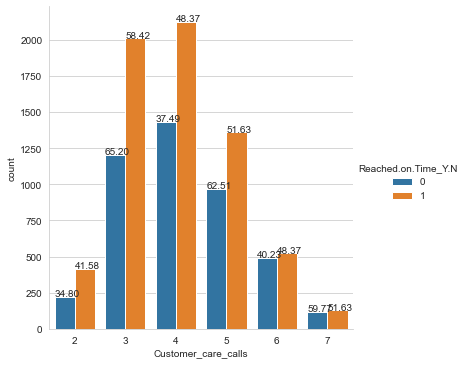

In [158]:
ctplot = sns.catplot(data = df_dropped, kind='count', x = 'Customer_care_calls', hue = 'Reached.on.Time_Y.N')

bar_order = product([2,3,4,5,6,7],[0,1])

spots = zip(ctplot.ax.patches, bar_order)
for spot in spots:
    class_total = len(df_dropped[df_dropped['Customer_care_calls']==spot[1][0]])
    class_who_total = len(df_dropped[(df_dropped['Customer_care_calls']==spot[1][0]) & 
        (df_dropped['Reached.on.Time_Y.N']==spot[1][1])])
    height = spot[0].get_height() 
    ctplot.ax.text(spot[0].get_x(), height+3, '{:1.2f}'.format(class_who_total/class_total*100))

In [43]:
# Ratio for different number if calls
a = df_dropped['Customer_care_calls'].unique()
a.sort()
for i in a:
    arrival_i_rated = df_dropped[df_dropped['Customer_care_calls'] == i]
    print("The ratio when number of calls =", i, "is", ratio_time(arrival_i_rated))

The ratio when number of calls = 2 is 0.34796238244514105
The ratio when number of calls = 3 is 0.3748834317687286
The ratio when number of calls = 4 is 0.40230531346640425
The ratio when number of calls = 5 is 0.41580756013745707
The ratio when number of calls = 6 is 0.4837117472852912
The ratio when number of calls = 7 is 0.483739837398374


**Answer:** We see that the ratio of on time arrivals slowly increases as the calls increase, and then significantly increase for the customers who call 6-7 times. So, yes the customer query is being answered to some extent.

**c) If Product importance is high. having higest rating or being delivered on time?**

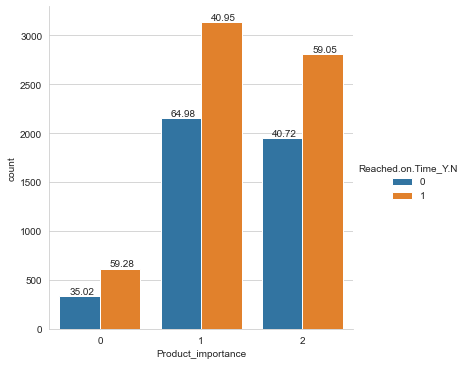

In [167]:
ctplot = sns.catplot(data = df_dropped, kind='count', x = 'Product_importance', hue = 'Reached.on.Time_Y.N')

bar_order = product([0,1,2], [0,1])

spots = zip(ctplot.ax.patches, bar_order)
for spot in spots:
    class_total = len(df_dropped[df_dropped['Product_importance']==spot[1][0]])
    class_who_total = len(df_dropped[(df_dropped['Product_importance']==spot[1][0]) & 
        (df_dropped['Reached.on.Time_Y.N']==spot[1][1])])
    height = spot[0].get_height() 
    ctplot.ax.text(spot[0].get_x()+0.1, height+20, '{:1.2f}'.format(class_who_total/class_total*100))

In [45]:
# Ratio for different product importance
a = df_dropped['Product_importance'].unique()
a.sort()
for i in a:
    arrival_i_rated = df_dropped[df_dropped['Product_importance'] == i]
    print("The ratio when Product importance is =", i, "is", ratio_time(arrival_i_rated))

The ratio when Product importance is = 0 is 0.350210970464135
The ratio when Product importance is = 1 is 0.4072116292240891
The ratio when Product importance is = 2 is 0.40954985275557426


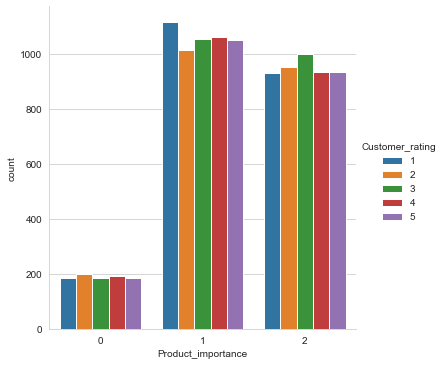

In [178]:
ctplot = sns.catplot(data = df_dropped,kind='count', hue = 'Customer_rating', x = 'Product_importance')

Let us write some code to find the distribution in rating among difference importance classes

In [47]:
# function to calculate distribution of rating
def ratio_rating(data):
    ratings = [1,2,3,4,5]
    rating_ratio = []
    for i in ratings:
        rating_numer = (data[data['Customer_rating']==i].count(axis = 1).count())
        rating_denom = (data.count(axis = 1).count())
        rating_ratio.append(rating_numer/rating_denom)
    return rating_ratio

In [48]:
ratio_rating(df_dropped)

[0.2032002909355396,
 0.19683607600690972,
 0.20356396036003274,
 0.19901809255386854,
 0.19738158014364943]

In [49]:
# Distribution of rating for different importance
a = df_dropped['Product_importance'].unique()
a.sort()
for i in a:
    rating_i_imp = df_dropped[df_dropped['Product_importance'] == i]
    print("For importance =", i, ratio_rating(rating_i_imp))# Ratio for different number if calls

For importance = 0 [0.1962025316455696, 0.20991561181434598, 0.1940928270042194, 0.20358649789029537, 0.1962025316455696]
For importance = 1 [0.21087407966773644, 0.1916178969227865, 0.1989805550311497, 0.20011327166320558, 0.19841419671512175]
For importance = 2 [0.19604543542280184, 0.20004206983592765, 0.2105595288178376, 0.19688683214135466, 0.19646613378207825]


**Answer:** We can make two inferences here-

* low importance product arrive on time less often as compared to medium and high

* There is not any noteworthy effect of Customer_rating on Product_importance and vice-versa

That is, if product rating is high, it does not necessarily mean that it has better rating and is delivered on time.

## (iv) Feature Engineering and Analysis

Now that we have analysed and visualised the data, we have more understanding of the features. We try to remove and extract some features and visualize them in hopes of reducing dimensionality without losing relevant information. This is done because higher dimensionality not only increases computation time, but it also increases the risk of overfitting and might give too much noice to the model. The models on the engineered dataset would be compared to the original dataset.

In [50]:
df_dropped.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   Customer_care_calls    10999 non-null  int64
 1   Customer_rating        10999 non-null  int64
 2   Cost_of_the_Product    10999 non-null  int64
 3   Prior_purchases        10999 non-null  int64
 4   Product_importance     10999 non-null  int32
 5   Discount_offered       10999 non-null  int64
 6   Weight_in_gms          10999 non-null  int64
 7   Reached.on.Time_Y.N    10999 non-null  int64
 8   Gender_M               10999 non-null  uint8
 9   Mode_of_Shipment_Road  10999 non-null  uint8
 10  Mode_of_Shipment_Ship  10999 non-null  uint8
 11  Warehouse_block_B      10999 non-null  uint8
 12  Warehouse_block_C      10999 non-null  uint8
 13  Warehouse_block_D      10999 non-null  uint8
 14  Warehouse_block_F      10999 non-null  uint8
dtypes: int32(1), int64(7), uint8(7)
memo

In [51]:
df_feat = df_dropped.copy(deep=True)

We create a feature known as effective cost which is the cost of the product after it has been discounted and replace with 'Cost_of_the_Product'. After this we will analyse if the 'Discount_offered' can be dropped.

In [52]:
df_feat['Effective_Cost'] = df_feat['Cost_of_the_Product'] - ((df_feat['Discount_offered']/100)*df_feat['Cost_of_the_Product'])
df_feat['Actual_Discount'] = df_feat['Discount_offered']*df_feat['Cost_of_the_Product']

In [53]:
df_feat.head()

,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N,Gender_M,Mode_of_Shipment_Road,Mode_of_Shipment_Ship,Warehouse_block_B,Warehouse_block_C,Warehouse_block_D,Warehouse_block_F,Effective_Cost,Actual_Discount
0,4,2,177,3,1,44,1233,1,0,0,0,0,0,1,0,99.12,7788
1,4,5,216,2,1,59,3088,1,1,0,0,0,0,0,1,88.56,12744
2,2,2,183,4,1,48,3374,1,1,0,0,0,0,0,0,95.16,8784
3,3,3,176,4,2,10,1177,1,1,0,0,1,0,0,0,158.40,1760
4,2,2,184,3,2,46,2484,1,0,0,0,0,1,0,0,99.36,8464


We recall that the Cost of the Product column was the one with the highest VIF(18.58) . Let us see if this new feature has a smaller VIF.

In [54]:
# the set of categorical variables
X_dropped = df_feat.drop(['Reached.on.Time_Y.N','Cost_of_the_Product'], axis = 1)
  
# VIF dataframe
vif_data = pd.DataFrame()
vif_data["Variable"] = X_dropped.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X_dropped.values, i)
                          for i in range(len(X_dropped.columns))]
vif_data

,Variable,VIF
0,Customer_care_calls,15.054951
1,Customer_rating,5.252191
2,Prior_purchases,6.526925
3,Product_importance,5.311409
4,Discount_offered,26.062784
5,Weight_in_gms,5.471798
6,Gender_M,1.966677
7,Mode_of_Shipment_Road,1.928835
8,Mode_of_Shipment_Ship,4.941935
9,Warehouse_block_B,1.951119


We see that the VIF was only slightly reduced. This data would result in a marginally better model as compared to the original(especially for models that assume independence). So we can even consider dropping the feature.

**WORK IN PROGRESS**

# 4) Data pre-processing:

In [55]:
X = df_dropped.drop(['Reached.on.Time_Y.N'], axis = 1)  # the predictors 
Y = df_dropped['Reached.on.Time_Y.N']  # the target attribute

In [56]:
#Spliting Train Test and Validation
def split(df_independent, df_dependent):
    X_train, X_test, y_train, y_test = train_test_split(df_independent, df_dependent, test_size=0.2, random_state=42, stratify = df_dependent)
    X_red, X_val, y_red, y_val = train_test_split(X_train, y_train, test_size=0.2,random_state=42, stratify = y_train) # reduced test and validation
    return X_train, X_test, X_red, X_val, y_train, y_test, y_red, y_val

In [57]:
X_train, X_test, X_red, X_val, y_train, y_test, y_red, y_val = split(X,Y)

In [58]:
Y.describe()  # characteristics of original data

count    10999.000000
mean         0.596691
std          0.490584
min          0.000000
25%          0.000000
50%          1.000000
75%          1.000000
max          1.000000
Name: Reached.on.Time_Y.N, dtype: float64

In [59]:
y_red.describe()  # characteristics of train data (implying the same for test)

count    7039.000000
mean        0.596676
std         0.490600
min         0.000000
25%         0.000000
50%         1.000000
75%         1.000000
max         1.000000
Name: Reached.on.Time_Y.N, dtype: float64

We use the stratify parameter of the split to ensure that the splits preserve the statistical characteristics of the original data as can be seen above.

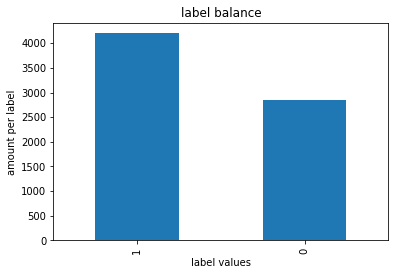

In [60]:
y_red.value_counts().plot(kind='bar')
plt.title('label balance')
plt.xlabel('label values')
plt.ylabel('amount per label')
plt.show()

## (i) Target Balancing:

We see that the target attributes are not balanced. So we perform target balancing. We have two ways to go forward-
* Method 1- Undersampling (Dropping entries from majority class)
* Method 2- Oversampling (SMOTE - Synthetic Minority Oversampling Technique)

We balance only the train set to train the model better and keep the test set as is, to measure the ability to generalize

### Method 1 - Undersampling:

In [61]:
def under(X_red, y_red, X_train, y_train):
    undersample = RandomUnderSampler(sampling_strategy='majority', random_state = 42)
    X_red_under, y_red_under = undersample.fit_resample(X_red, y_red)
    X_train_under, y_train_under = undersample.fit_resample(X_train, y_train)
    return X_red_under, y_red_under, X_train_under, y_train_under

In [62]:
X_red_under, y_red_under, X_train_under, y_train_under = under(X_red, y_red, X_train, y_train)

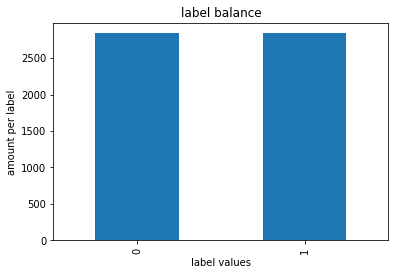

In [63]:
# plots the balanced distribution of reduced training set
y_red_under.value_counts().plot(kind='bar')
plt.title('label balance')
plt.xlabel('label values')
plt.ylabel('amount per label')
plt.show()

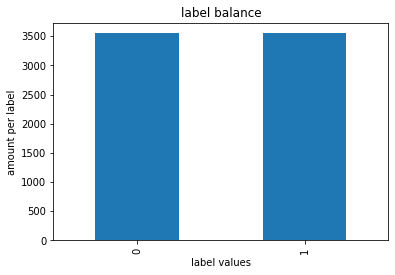

In [64]:
# plots the balanced distribution of complete training set
y_train_under.value_counts().plot(kind='bar')
plt.title('label balance')
plt.xlabel('label values')
plt.ylabel('amount per label')
plt.show()

The dataset is balanced

### Method 2 - Oversampling (SMOTE)

In [65]:
# transform the dataset
def over(X_red, y_red, X_train, y_train):
    oversample = SMOTE(random_state = 42)
    X_red_smote, y_red_smote = oversample.fit_resample(X_red, y_red)
    X_train_smote, y_train_smote = oversample.fit_resample(X_train, y_train)
    return X_red_smote, y_red_smote, X_train_smote, y_train_smote

In [66]:
X_red_smote, y_red_smote, X_train_smote, y_train_smote = over(X_red, y_red, X_train, y_train)

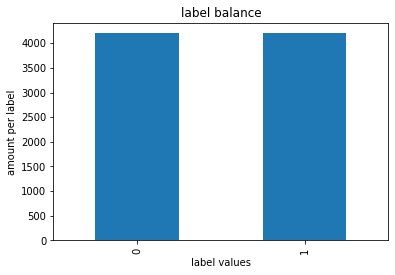

In [67]:
# plots the balanced distribution of reduced training set
y_red_smote.value_counts().plot(kind='bar')
plt.title('label balance')
plt.xlabel('label values')
plt.ylabel('amount per label')
plt.show()

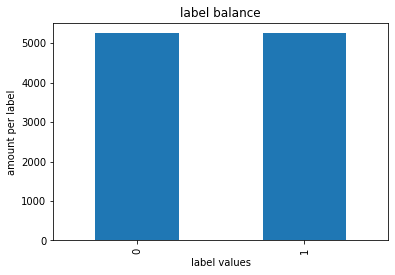

In [68]:
# plots the balanced distribution of complete training set
y_train_smote.value_counts().plot(kind='bar')
plt.title('label balance')
plt.xlabel('label values')
plt.ylabel('amount per label')
plt.show()

## (ii) Scaling the dataset

Done as and when required

# 5) Model training, testing and tuning:

We use classification metric as our performance metric. We also use other metrics, like f1 scores, precision, recall, ROC curves etc whenever a more detailed analysis is required.

## Base Models:

Before moving on to modelling the pre-processed data, we try to model the raw unprocessed data using some basic untuned models to get a performance benchmark.

In [69]:
# function to evaluate the models
def evaluate(model, X_test, y_test):
    predic = model.predict(X_test)

    #printing f1, precision and recall
    print("f1 Score:", f1_score(y_test, predic))
    #print("Precision Score:", precision_score(y_test, predic,average=None))
    #print("Recall Score:", recall_score(y_test, predic,average=None))
    
    #finding Confusion_matrix
    conf_mat = confusion_matrix(y_test, predic)
    percent_matrix = (conf_mat.T/conf_mat.sum(axis=1)*100).T
    #plotting Confusion Matrix
    class_label = [0,1]
    df = pd.DataFrame(percent_matrix, index = class_label, columns = class_label)
    sns.heatmap(df, annot = True, vmax=100, vmin=0)
    plt.title("Confusion Matrix")
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.show()
    
    print("Accuracy:", accuracy_score(y_test, predic))

f1 Score: 0.6845214651437573


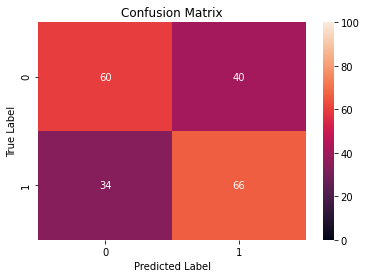

Accuracy: 0.6359090909090909


In [70]:
# Trying out Logistic Regression
base_lr = LogisticRegression()
base_lr.fit(X_train, y_train)
evaluate(base_lr, X_test, y_test)

f1 Score: 0.6846925425207152


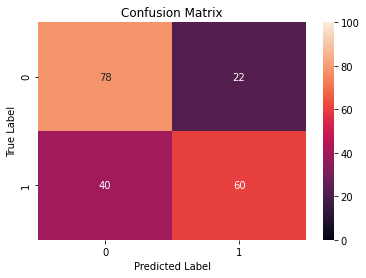

Accuracy: 0.6713636363636364


In [71]:
# Trying out Multinomial Naive Bayes
base_mnb = MultinomialNB()
base_mnb.fit(X_train, y_train)
evaluate(base_mnb, X_test, y_test)

f1 Score: 0.5879851143009037


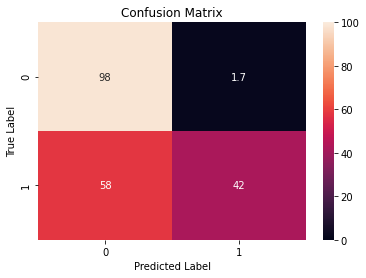

Accuracy: 0.6477272727272727


In [72]:
# Trying out Gaussian Naive Bayes
base_gnb = GaussianNB()
base_gnb.fit(X_train, y_train)
evaluate(base_gnb, X_test, y_test)

Compare MNB and GNB,they complement each other wonderfully. We can look into ways to take advantages of both.

f1 Score: 0.6927330173775671


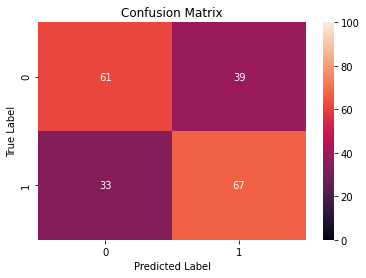

Accuracy: 0.6463636363636364


In [73]:
# Trying out KNN
KNN = KNeighborsClassifier()
KNN.fit(X_train, y_train)
evaluate(KNN, X_test, y_test)

f1 Score: 0.7029665790461885


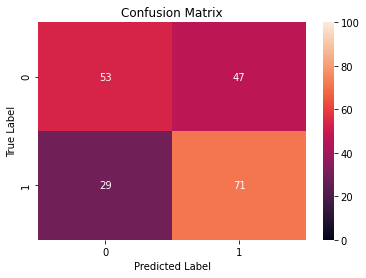

Accuracy: 0.6404545454545455


In [74]:
#Trying out Decision Tree
DecisionTree=DecisionTreeClassifier(random_state = 42)
DecisionTree.fit(X_train,y_train)
evaluate(DecisionTree, X_test, y_test)

f1 Score: 0.6838328408611228


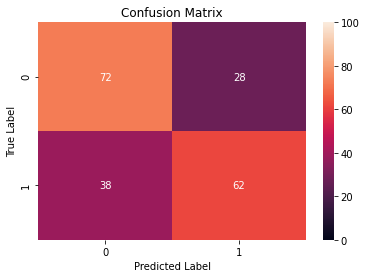

Accuracy: 0.6595454545454545


In [75]:
# Trying out Random Forest
RandomForest=RandomForestClassifier(random_state = 42)
RandomForest.fit(X_train,y_train)
evaluate(RandomForest, X_test, y_test)

In [76]:
# Finding accuracy using K-Fold Cross Validation method
kfold = StratifiedKFold(n_splits=10,random_state=42,shuffle=True) # k=10, split the data into 10 equal parts
xyz=[]
f1=[]
std=[]
classifiers=['Logistic Regression','KNN','Decision Tree','Random Forest', 'BernoulliNB', 'MultinomialNB', 'GaussianNB']
models=[LogisticRegression(max_iter = 1000),KNeighborsClassifier(),DecisionTreeClassifier(random_state = 42),RandomForestClassifier(random_state = 42), BernoulliNB(), MultinomialNB(), GaussianNB()]
for i in models:
    model = i
    cv_result = cross_val_score(model,X_test,y_test, cv = kfold,scoring = "accuracy")
    xyz.append(cv_result.mean())
    std.append(cv_result.std())
    f1.append(cv_result)
new_models_dataframe1=pd.DataFrame({'CV Mean':xyz,'Std':std},index=classifiers)       
new_models_dataframe1

,CV Mean,Std
Logistic Regression,0.631818,0.044117
KNN,0.656364,0.023897
Decision Tree,0.647727,0.032413
Random Forest,0.664545,0.027106
BernoulliNB,0.595455,0.003521
MultinomialNB,0.670909,0.035860
GaussianNB,0.652273,0.025491


## Improving Model Performance:

After this we will move on to tune this models and apply feature engineering for better performance.
Things to try -


1) Dropping the features with high multi-collinearity

2) Try out a feature called 'Effective_Cost' i.e Cost after discounting in place of (i) both Cost and Discount, (ii) Only Cost

3) Target Balancing: Undersampling v/s Oversampling

4) Scaling the dataset: Robust v/s MinMax v/s Standard v/s Normalizer

5) The current data was already One-hot encoded. We try Label encoding for Decision Trees and Random Forest Classifiers

6) Tuning the hyperparameters

7) Trying to combine models (stacking, ensembling etc.)

8) Finding optimal combination of the above methods

9) Adjusting thresholds to balance precision and recall in order to optimise f1 score

We implement these things on the training set and measure performance on the validation set. Only after we find the optimal validation score for a given model, we measure the performance on the test set and we do not re-tune if that performance is not upto mark(to ensure generalisation). We compare the test scores at the end to find out the most suitable model. **The metric to be used is accuracy score.**

#### 1) Feature Engineering:

Given the design of Logistic Regression, it would not help much if we drop features or create new features by linear operations. So we try to create non linear features which might help in improving the accuracy.

In [77]:
X = df_feat.drop(['Reached.on.Time_Y.N'], axis = 1)  # the predictors 
Y = df_feat['Reached.on.Time_Y.N']  # the target attribute

In [78]:
X_train, X_test, X_red, X_val, y_train, y_test, y_red, y_val = split(X,Y)

In [79]:
X_train

,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Discount_offered,Weight_in_gms,Gender_M,Mode_of_Shipment_Road,Mode_of_Shipment_Ship,Warehouse_block_B,Warehouse_block_C,Warehouse_block_D,Warehouse_block_F,Effective_Cost,Actual_Discount
7920,4,1,261,2,2,9,4158,0,1,0,0,0,1,0,237.51,2349
1529,3,3,162,2,1,26,1659,0,0,1,0,0,0,1,119.88,4212
10521,3,2,221,2,2,9,4466,1,0,1,1,0,0,0,201.11,1989
9558,3,5,157,4,2,2,4640,0,0,1,0,0,1,0,153.86,314
968,2,5,272,2,1,24,3638,1,0,0,0,0,0,0,206.72,6528
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9573,4,4,204,3,1,9,4757,0,1,0,1,0,0,0,185.64,1836
4876,4,2,237,3,1,7,4785,0,0,1,0,1,0,0,220.41,1659
3708,4,1,140,4,1,6,5067,1,0,0,0,0,1,0,131.60,840
6201,4,4,251,2,2,6,4376,0,0,1,1,0,0,0,235.94,1506


In [80]:
# Finding accuracy using K-Fold Cross Validation method
kfold = StratifiedKFold(n_splits=10,random_state=42,shuffle=True) # k=10, split the data into 10 equal parts
xyz=[]
f1=[]
std=[]
classifiers=['Logistic Regression','KNN','Decision Tree','Random Forest', 'BernoulliNB', 'MultinomialNB', 'GaussianNB']
models=[LogisticRegression(max_iter = 1000),KNeighborsClassifier(),DecisionTreeClassifier(random_state = 42),RandomForestClassifier(random_state = 42), BernoulliNB(), MultinomialNB(), GaussianNB()]
for i in models:
    model = i
    cv_result = cross_val_score(model,X_test,y_test, cv = kfold,scoring = "accuracy")
    xyz.append(cv_result.mean())
    std.append(cv_result.std())
    f1.append(cv_result)
new_models_dataframe2=pd.DataFrame({'CV Mean':xyz,'Std':std},index=classifiers)       
new_models_dataframe2

,CV Mean,Std
Logistic Regression,0.639545,0.046357
KNN,0.646818,0.033896
Decision Tree,0.646364,0.015588
Random Forest,0.661364,0.028112
BernoulliNB,0.595455,0.003521
MultinomialNB,0.645909,0.031126
GaussianNB,0.642727,0.026206


In [81]:
new_models_dataframe1

,CV Mean,Std
Logistic Regression,0.631818,0.044117
KNN,0.656364,0.023897
Decision Tree,0.647727,0.032413
Random Forest,0.664545,0.027106
BernoulliNB,0.595455,0.003521
MultinomialNB,0.670909,0.035860
GaussianNB,0.652273,0.025491


Improved only for Logistic Regression. New LR baseline 0.639

In [82]:
X = df_redduced.drop(['Reached.on.Time_Y.N'], axis = 1)  # the predictors 
Y = df_redduced['Reached.on.Time_Y.N']  # the target attribute

In [83]:
X_train, X_test, X_red, X_val, y_train, y_test, y_red, y_val = split(X,Y)

In [84]:
X_train

,Customer_rating,Prior_purchases,Product_importance,Weight_in_gms,Gender_M,Mode_of_Shipment_Road,Mode_of_Shipment_Ship,Warehouse_block_B,Warehouse_block_C,Warehouse_block_D,Warehouse_block_F,Actual_Discount
7920,1,2,2,4158,0,1,0,0,0,1,0,2349
1529,3,2,1,1659,0,0,1,0,0,0,1,4212
10521,2,2,2,4466,1,0,1,1,0,0,0,1989
9558,5,4,2,4640,0,0,1,0,0,1,0,314
968,5,2,1,3638,1,0,0,0,0,0,0,6528
...,...,...,...,...,...,...,...,...,...,...,...,...
9573,4,3,1,4757,0,1,0,1,0,0,0,1836
4876,2,3,1,4785,0,0,1,0,1,0,0,1659
3708,1,4,1,5067,1,0,0,0,0,1,0,840
6201,4,2,2,4376,0,0,1,1,0,0,0,1506


In [85]:
# Finding accuracy using K-Fold Cross Validation method
kfold = StratifiedKFold(n_splits=10,random_state=42,shuffle=True) # k=10, split the data into 10 equal parts
xyz=[]
f1=[]
std=[]
classifiers=['Logistic Regression','KNN','Decision Tree','Random Forest', 'BernoulliNB', 'MultinomialNB', 'GaussianNB']
models=[LogisticRegression(max_iter = 1000),KNeighborsClassifier(),DecisionTreeClassifier(random_state = 42),RandomForestClassifier(random_state = 42), BernoulliNB(), MultinomialNB(), GaussianNB()]
for i in models:
    model = i
    cv_result = cross_val_score(model,X_test,y_test, cv = kfold,scoring = "accuracy")
    xyz.append(cv_result.mean())
    std.append(cv_result.std())
    f1.append(cv_result)
new_models_dataframe2=pd.DataFrame({'CV Mean':xyz,'Std':std},index=classifiers)       
new_models_dataframe2

,CV Mean,Std
Logistic Regression,0.641818,0.034426
KNN,0.648182,0.025487
Decision Tree,0.645000,0.034763
Random Forest,0.653636,0.021301
BernoulliNB,0.595455,0.003521
MultinomialNB,0.645909,0.034103
GaussianNB,0.636818,0.021460


In [86]:
new_models_dataframe1

,CV Mean,Std
Logistic Regression,0.631818,0.044117
KNN,0.656364,0.023897
Decision Tree,0.647727,0.032413
Random Forest,0.664545,0.027106
BernoulliNB,0.595455,0.003521
MultinomialNB,0.670909,0.035860
GaussianNB,0.652273,0.025491


Increased only for Logistic Regression, bew baseline 0.641

In [87]:
X = df_reduced.drop(['Reached.on.Time_Y.N'], axis = 1)  # the predictors 
Y = df_reduced['Reached.on.Time_Y.N']  # the target attribute

In [88]:
X_train, X_test, X_red, X_val, y_train, y_test, y_red, y_val = split(X,Y)

In [89]:
X_train

,Customer_care_calls,Customer_rating,Prior_purchases,Product_importance,Weight_in_gms,Gender_M,Mode_of_Shipment_Road,Mode_of_Shipment_Ship,Warehouse_block_B,Warehouse_block_C,Warehouse_block_D,Warehouse_block_F,Actual_Discount
7920,4,1,2,2,4158,0,1,0,0,0,1,0,2349
1529,3,3,2,1,1659,0,0,1,0,0,0,1,4212
10521,3,2,2,2,4466,1,0,1,1,0,0,0,1989
9558,3,5,4,2,4640,0,0,1,0,0,1,0,314
968,2,5,2,1,3638,1,0,0,0,0,0,0,6528
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9573,4,4,3,1,4757,0,1,0,1,0,0,0,1836
4876,4,2,3,1,4785,0,0,1,0,1,0,0,1659
3708,4,1,4,1,5067,1,0,0,0,0,1,0,840
6201,4,4,2,2,4376,0,0,1,1,0,0,0,1506


In [90]:
# Finding accuracy using K-Fold Cross Validation method
kfold = StratifiedKFold(n_splits=10,random_state=42,shuffle=True) # k=10, split the data into 10 equal parts
xyz=[]
f1=[]
std=[]
classifiers=['Logistic Regression','KNN','Decision Tree','Random Forest', 'BernoulliNB', 'MultinomialNB', 'GaussianNB']
models=[LogisticRegression(max_iter = 1000),KNeighborsClassifier(),DecisionTreeClassifier(random_state = 42),RandomForestClassifier(random_state = 42), BernoulliNB(), MultinomialNB(), GaussianNB()]
for i in models:
    model = i
    cv_result = cross_val_score(model,X_test,y_test, cv = kfold,scoring = "accuracy")
    xyz.append(cv_result.mean())
    std.append(cv_result.std())
    f1.append(cv_result)
new_models_dataframe2=pd.DataFrame({'CV Mean':xyz,'Std':std},index=classifiers)       
new_models_dataframe2

,CV Mean,Std
Logistic Regression,0.632273,0.039702
KNN,0.648182,0.025487
Decision Tree,0.644091,0.035094
Random Forest,0.646364,0.022434
BernoulliNB,0.595455,0.003521
MultinomialNB,0.645909,0.034103
GaussianNB,0.639091,0.023461


In [91]:
new_models_dataframe1

,CV Mean,Std
Logistic Regression,0.631818,0.044117
KNN,0.656364,0.023897
Decision Tree,0.647727,0.032413
Random Forest,0.664545,0.027106
BernoulliNB,0.595455,0.003521
MultinomialNB,0.670909,0.035860
GaussianNB,0.652273,0.025491


**Summary**: Baseline accuracy has increased from 0.634 to 0.641 for Logistic Regression when Customer_care_calls and Cost_of_the_product were dropped and the feature Actual_Discount was used. For the rest of the models, using the original dataset leads to best results.

### (i) Logistic Regression

We look at all the things mentioned above, one at a time and try to imrpove the performance for the model. The current baseline **accuracy score** for Logistic Regression is **0.641**(Engineered Dataset) and in general, it is **0.670**. We measure all the performances using validation set, and keep the test set away until we finalise the tuning, where we perform a K-fold cross validation like above.

After experimentation, we have concluded that after tuning and balancing etc., the original dataset leads to better results

In [92]:
#X = df_redduced.drop(['Reached.on.Time_Y.N'], axis = 1)  # the predictors 
#Y = df_redduced['Reached.on.Time_Y.N']  # the target attribute
X = df_dropped.drop(['Reached.on.Time_Y.N'], axis = 1)  # the predictors 
Y = df_dropped['Reached.on.Time_Y.N']  # the target attribute

In [93]:
X_train, X_test, X_red, X_val, y_train, y_test, y_red, y_val = split(X,Y)

#### 1) Undersampling vs Oversampling

We use target balancing only on the reduced training set and not balance the validation set so we can get better generalisations as unseen data may not be balanced.

In [94]:
X_red_under, y_red_under, X_train_under, y_train_under = under(X_red, y_red, X_train, y_train)

**Under-sampling**

f1 Score: 0.6249247441300422


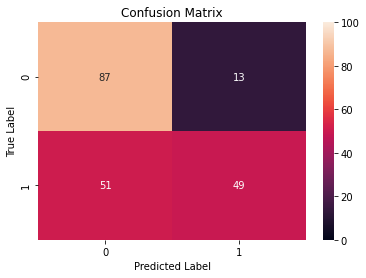

Accuracy: 0.6460227272727272


In [95]:
# Fitting the undersampled data and calculating macro f1 score
lr = LogisticRegression(max_iter = 1000)
lr.fit(X_red_under, y_red_under)
evaluate(lr, X_val, y_val)

**Over-Sampling**

In [96]:
X_red_smote, y_red_smote, X_train_smote, y_train_smote = over(X_red, y_red, X_train, y_train)

f1 Score: 0.6589785831960461


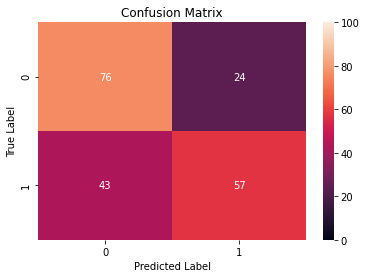

Accuracy: 0.647159090909091


In [97]:
# Fitting the SMOTE data and calculating macro f1 score
lr = LogisticRegression(max_iter = 1000)
lr.fit(X_red_smote, y_red_smote)
evaluate(lr, X_val, y_val)

Accuracy has increased, so we use the Undersampled dataset

#### 2) Scaling the dataset: Robust v/s MinMax v/s Standard v/s Normalizer

In [98]:
### NOT A PART OF THE CODE
# IGNORE, using this to reduce unnecessary corrections, under still means the SMOTE dataset
#X_red_under, y_red_under, X_train_under, y_train_under = X_red_smote, y_red_smote, X_train_smote, y_train_smote

We try different types of scaling on the dataset to see which works best. We fit the scalers only on the reduced training set to prevent data leakage.

Min-Max Scaler

In [99]:
scaler = preprocessing.MinMaxScaler()
X_red_under_mms = scaler.fit_transform(X_red_under)
X_val_mms = scaler.transform(X_val)
X_train_under_mms = scaler.fit_transform(X_train_under)
X_test_mms = scaler.transform(X_test)

Standard Scaler

In [100]:
scaler = preprocessing.StandardScaler()
X_red_under_std = scaler.fit_transform(X_red_under)
X_val_std = scaler.transform(X_val)
X_train_under_std = scaler.fit_transform(X_train_under)
X_test_std = scaler.transform(X_test)

Robust Scaler

In [101]:
scaler = preprocessing.RobustScaler()
X_red_under_rob = scaler.fit_transform(X_red_under)
X_val_rob = scaler.transform(X_val)
X_train_under_rob = scaler.fit_transform(X_train_under)
X_test_rob = scaler.transform(X_test)

Normalizer

In [102]:
scaler = preprocessing.Normalizer()
X_red_under_norm = scaler.fit_transform(X_red_under)
X_val_norm = scaler.transform(X_val)
X_train_under_norm = scaler.fit_transform(X_train_under)
X_test_norm = scaler.transform(X_test)

Custom Scaling

In [103]:
# Scaling certain features specifically depending upon their distribution
stand = preprocessing.StandardScaler()
norm = preprocessing.MinMaxScaler()
robust = preprocessing.RobustScaler()

X_red_under_cust = X_red_under.copy(deep = True)
X_val_cust = X_val.copy(deep = True)
X_train_under_cust = X_train_under.copy(deep = True)
X_test_cust = X_test.copy(deep = True)

X_red_under_cust[['Weight_in_gms']] = robust.fit_transform(X_red_under[['Weight_in_gms']])
X_val_cust[['Weight_in_gms']] = robust.transform(X_val[['Weight_in_gms']])
X_train_under_cust[['Weight_in_gms']] = robust.fit_transform(X_train_under[['Weight_in_gms']])
X_test_cust[['Weight_in_gms']] = robust.transform(X_test[['Weight_in_gms']])
#cols = ['Customer_rating','Weight_in_gms', 'Product_importance', 'Prior_purchases']

X_red_under_cust = norm.fit_transform(X_red_under_cust)
X_val_cust = norm.transform(X_val_cust)
X_train_under_cust = norm.fit_transform(X_train_under_cust)
X_test_cust = norm.transform(X_test_cust)



We have already scaled the balanced datasets, we just need to evaluate model performance. Current baseline is 0.641

f1 Score: 0.6303317535545024


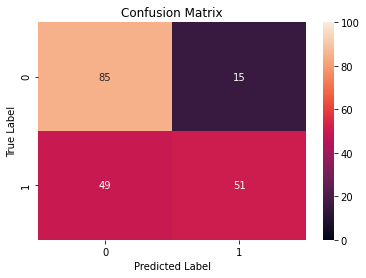

Accuracy: 0.6454545454545455


In [104]:
# Scaling the undersampled dataset with MinMaxScaler() and calculating macro f1 score
lr = LogisticRegression(max_iter = 1000)
lr.fit(X_red_under_mms, y_red_under)
evaluate(lr, X_val_mms, y_val)

f1 Score: 0.6332547169811322


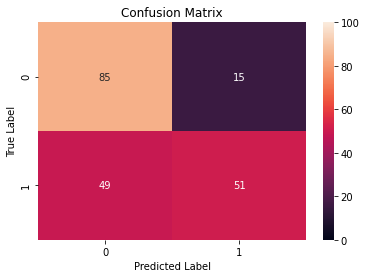

Accuracy: 0.6465909090909091


In [105]:
# Scaling the undersampled dataset with StandardScaler() and calculating macro f1 score
lr = LogisticRegression(max_iter = 1000)
lr.fit(X_red_under_std, y_red_under)
evaluate(lr, X_val_std, y_val)

f1 Score: 0.6340601060695344


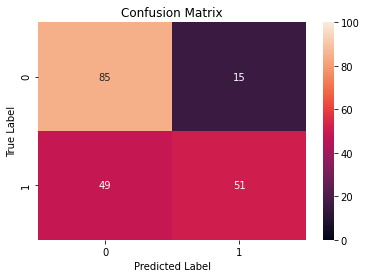

Accuracy: 0.647159090909091


In [106]:
# Scaling the undersampled dataset with RobustScaler() and calculating macro f1 score
lr = LogisticRegression(max_iter = 1000)
lr.fit(X_red_under_rob, y_red_under)
evaluate(lr, X_val_rob, y_val)

f1 Score: 0.6032110091743119


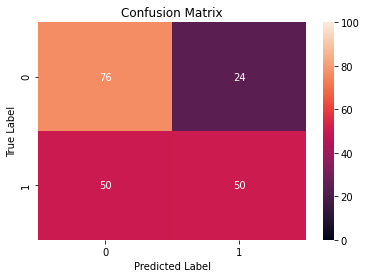

Accuracy: 0.6068181818181818


In [107]:
# Scaling the undersampled dataset with Normalizer() and calculating macro f1 score
lr = LogisticRegression(max_iter = 1000)
lr.fit(X_red_under_norm, y_red_under)
evaluate(lr, X_val_norm, y_val)

**Custom Scaling** (MORE EXPERIMENTATION REQUIRED)

f1 Score: 0.6303317535545024


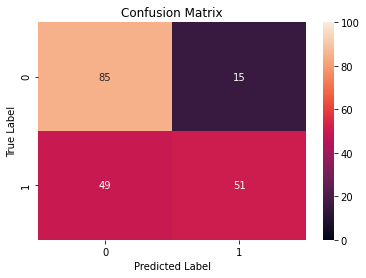

Accuracy: 0.6454545454545455


In [108]:
# Custom Scaling the undersampled dataset and calculating macro f1 score
lr = LogisticRegression(max_iter = 1000)
lr.fit(X_red_under_cust, y_red_under)
evaluate(lr, X_val_cust, y_val)

Robust Scaler works best

#### 4) tuning the hyperparameters:

In [109]:
# IGNORE, using this to reduce unnecessary corrections, cust still means robust scaling
X_red_under_cust, X_train_under_cust, X_val_cust, X_test_cust = X_red_under_rob, X_train_under_rob, X_val_rob, X_test_rob

In [110]:
#Calculating for finding Best Hyperparameter C
acc_red=[]
acc_val=[]
max_acc_score=0
C_best=0
tuned_parameters =[10**-6,10**-5,10**-4, 10**-2, 10**0, 10**1, 10**2, 10**3, 10**4, 10**6]
#tuned_parameters =[ 10**1, 10**2, 10**3]
# ned_parameters=[0.01, 0.05, 0.1]

for i in tuned_parameters:
    lr=LogisticRegression(C=i,class_weight = 'balanced', max_iter = 1000)
    # fitting the model on train data
    lr.fit(X_red_under_cust,y_red_under)
     #predict the response on the validation 
    pred_val = lr.predict(X_val_cust)
    #pred_val=(pred_val)[:,1]
    acc_val.append(accuracy_score(y_val,pred_val))
    
     # predict the response on the reduced training
    pred_red = lr.predict(X_red_under_cust)
    #pred_red = (pred_red)[:,1]
    acc_red.append(accuracy_score(y_red_under,pred_red))
    #finding best c using max value of auc score
    if accuracy_score(y_val,pred_val)>max_acc_score:
        C_best=i
        max_acc_score = accuracy_score(y_val,pred_val)
        
print(C_best)        
print(max_acc_score)
C1=C_best
auc1=max_acc_score

0.01
0.6494318181818182


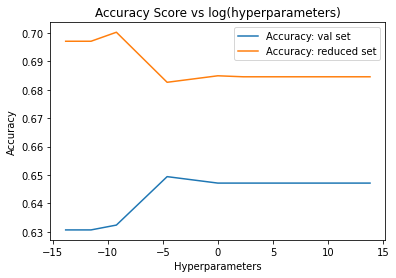

In [111]:
# plotting curve between C vs Train and Cross validation Data
plt.plot(np.log(tuned_parameters),acc_val ,label="Accuracy: val set")
plt.plot(np.log(tuned_parameters),acc_red,label="Accuracy: reduced set")
plt.legend()
plt.title('Accuracy Score vs log(hyperparameters)')
plt.xlabel('Hyperparameters')
plt.ylabel('Accuracy')
plt.show()

Fitting 5 folds for each of 200 candidates, totalling 1000 fits


Text(0.5, 1.0, 'Scoring for different class weights')

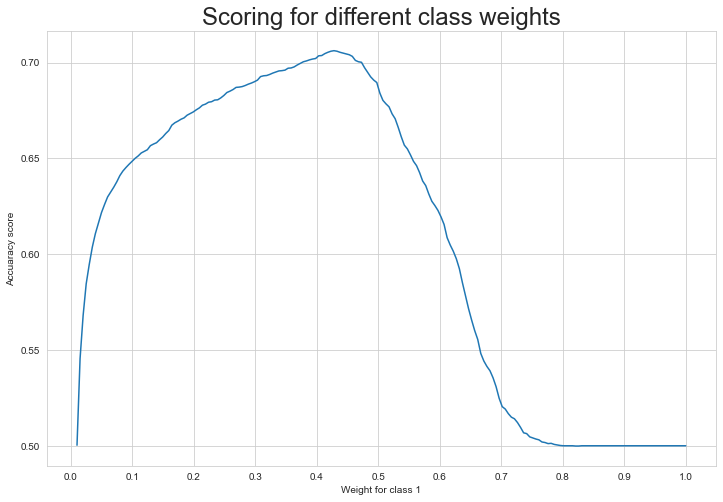

In [112]:
lr = LogisticRegression(C = C_best, max_iter = 1000)

#Setting the range for class weights
weights = np.linspace(0.0,0.99,200)

#Creating a dictionary grid for grid search
param_grid = {'class_weight': [{0:x, 1:1.0-x} for x in weights]}

#Fitting grid search to the train data with 5 folds
gridsearch = GridSearchCV(estimator= lr, 
                          param_grid= param_grid,
                          cv=StratifiedKFold(random_state=42,shuffle=True), 
                          n_jobs=-1, 
                          scoring='accuracy', 
                          verbose=2).fit(X_train_under_cust, y_train_under)

#Ploting the score for different values of weight
sns.set_style('whitegrid')
plt.figure(figsize=(12,8))
weigh_data = pd.DataFrame({ 'score': gridsearch.cv_results_['mean_test_score'], 'weight': (1- weights)})
sns.lineplot(data = weigh_data, x = 'weight', y = 'score')
plt.xlabel('Weight for class 1')
plt.ylabel('Accuaracy score')
plt.xticks([round(i/10,1) for i in range(0,11,1)])
plt.title('Scoring for different class weights', fontsize=24)

In [113]:
max = weigh_data['score'].max()
w = weigh_data['weight'][weigh_data['score'] == max]
weigh_data[weigh_data['score'] == max]

,score,weight
115,0.706255,0.427889


Therefore, using the optimal class weights

In [114]:
# training on complete train set and evaluating on test
lr = LogisticRegression(C = C_best, max_iter = 1000)
lr.fit(X_train_under_cust, y_train_under)
y_pred = lr.predict_proba(X_test_cust)
y_pred = y_pred[:, 1]
y_pred_prob = (y_pred > 0.5).astype('int')
accuracy_score(y_test, y_pred_prob)

0.65

Logistic improved from 0.634 to 0.65

### (ii) Multinomial-NB:

We use the original dataset. Baseline Accuracy = 0.670

#### 1) Undersampling vs Oversampling

We use target balancing only on the reduced training set and not balance the validation set so we can get better generalisations as unseen data may not be balanced.

In [115]:
X_red_under, y_red_under, X_train_under, y_train_under = under(X_red, y_red, X_train, y_train)

**Under-sampling**

f1 Score: 0.6582417582417582


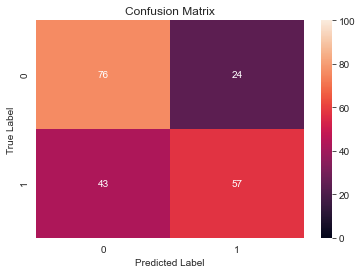

Accuracy: 0.6465909090909091


In [116]:
# Fitting the undersampled data and calculating macro f1 score
mnb = MultinomialNB()
mnb.fit(X_red_under, y_red_under)
evaluate(mnb, X_val, y_val)

**Over-Sampling**

In [117]:
X_red_smote, y_red_smote, X_train_smote, y_train_smote = over(X_red, y_red, X_train, y_train)

f1 Score: 0.6582417582417582


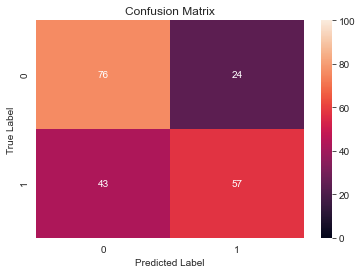

Accuracy: 0.6465909090909091


In [118]:
# Fitting the SMOTE data and calculating macro f1 score
mnb = MultinomialNB()
mnb.fit(X_red_smote, y_red_smote)
evaluate(mnb, X_val, y_val)

In [119]:
scaler = preprocessing.MinMaxScaler()
X_red_under_mms = scaler.fit_transform(X_red_under)
X_val_mms = scaler.transform(X_val)
X_train_under_mms = scaler.fit_transform(X_train_under)
X_test_mms = scaler.transform(X_test)

f1 Score: 0.6149068322981367


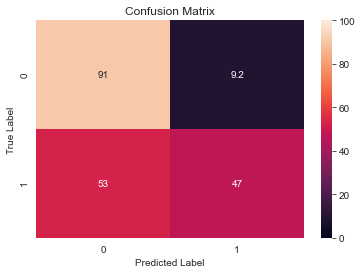

Accuracy: 0.6477272727272727


In [120]:
# Scaling the undersampled dataset with MinMaxScaler() and calculating f1 score
lr = MultinomialNB()
lr.fit(X_red_under_mms, y_red_under)
evaluate(lr, X_val_mms, y_val)

MinMax Scaler is the only option since MNB cannot take negative values. Accuracy slightly improved.

We go with undersampling as it gives better accuracy post scaling.

In [121]:
# IGNORE, using this to reduce unnecessary corrections, cust still means robust scaling
X_red_under_cust, X_train_under_cust, X_val_cust, X_test_cust = X_red_under_mms, X_train_under_mms, X_val_mms, X_test_mms

In [122]:
#Calculating for finding Best Hyperparameter C
acc_red=[]
acc_val=[]
max_acc_score=0
C_best=0
tuned_parameters =[10**-6,10**-5,10**-4, 10**-2, 10**0, 10**1, 10**2, 10**3, 10**4, 10**6]
#tuned_parameters =[ 10**1, 10**2, 10**3]
# ned_parameters=[0.01, 0.05, 0.1]

for i in tuned_parameters:
    lr = MultinomialNB(alpha = i)
    # fitting the model on train data
    lr.fit(X_red_under_cust,y_red_under)
     #predict the response on the validation 
    pred_val = lr.predict(X_val_cust)
    #pred_val=(pred_val)[:,1]
    acc_val.append(accuracy_score(y_val,pred_val))
    
     # predict the response on the reduced training
    pred_red = lr.predict(X_red_under_cust)
    #pred_red = (pred_red)[:,1]
    acc_red.append(accuracy_score(y_red_under,pred_red))
    #finding best c using max value of auc score
    if accuracy_score(y_val,pred_val)>max_acc_score:
        C_best=i
        max_acc_score = accuracy_score(y_val,pred_val)
        
print(C_best)        
print(max_acc_score)
C1=C_best
auc1=max_acc_score

10
0.65


f1 Score: 0.607853136155023


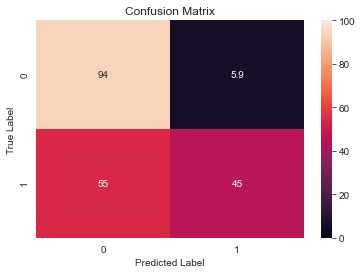

Accuracy: 0.6504545454545455


In [123]:
mnb = MultinomialNB(alpha = 10)
mnb.fit(X_train_under_cust, y_train_under)
evaluate(mnb, X_test_cust, y_test)

f1 Score: 0.6846925425207152


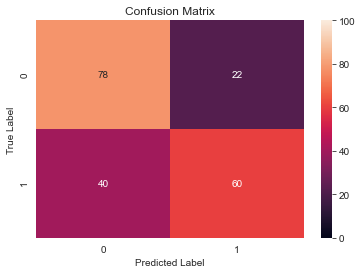

Accuracy: 0.6713636363636364


In [124]:
mnb = MultinomialNB()
mnb.fit(X_train, y_train)
evaluate(mnb, X_test, y_test)

0.6627272727272727
f1 Score: 0.7305737109658678


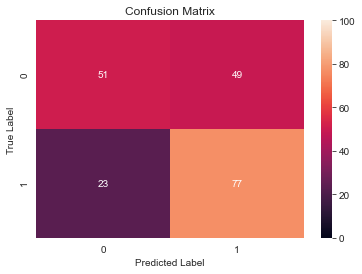

Accuracy: 0.6627272727272727
None


In [125]:
svmmodel= svm.SVC(kernel='poly', degree=5)
svmmodel.fit(X_train_under, y_train_under)
print(svmmodel.score(X_test, y_test))
print(evaluate(svmmodel, X_test, y_test))

In [126]:
adaboost = AdaBoostClassifier(n_estimators=1000)
scores = cross_val_score(adaboost, X_train_under, y_train_under, cv=5)
scores.mean()

0.7173857805040249

f1 Score: 0.6293279022403259


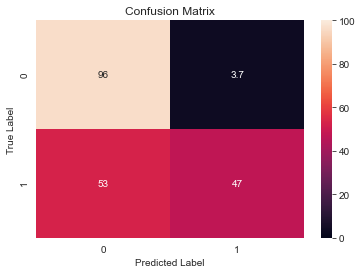

Accuracy: 0.6690909090909091
0.6690909090909091 None


In [127]:
adaboost.fit(X_train_under, y_train_under)
print(adaboost.score(X_test, y_test), evaluate(adaboost, X_test, y_test))

In [128]:
clf1= KNeighborsClassifier(n_neighbors=7)
clf2= DecisionTreeClassifier(random_state = 42)
clf3= LogisticRegression(max_iter=10000)
clf4= GaussianNB()
clf5= MultinomialNB()
clf6= RandomForestClassifier(n_estimators=50, random_state=1)
clf7 = svm.SVC(kernel='rbf')
clf8=BernoulliNB()

models_list=[('rf', clf6), ('gnb', clf4), ('tree', clf2),('lr', clf3), ('MNB', clf5),('SVM', clf7),('BNB', clf8)]
eclf = VotingClassifier(estimators=[('lr', clf3), ('rf', clf6), ('gnb', clf4), ('KNN', clf1), ('tree', clf2), ('MNB', clf5), ('SVM', clf7)],
                        voting='hard')


f1 Score: 0.6702127659574467


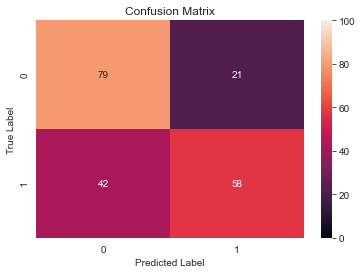

Accuracy: 0.6618181818181819
0.6618181818181819 None


In [129]:
stkmodel= StackingClassifier(estimators= models_list, final_estimator=KNeighborsClassifier(n_neighbors=7))
stkmodel.fit(X_train_under, y_train_under)
print(stkmodel.score(X_test, y_test), evaluate(stkmodel, X_test, y_test))

In [130]:
scores = cross_val_score(stkmodel, X_train_under, y_train_under, cv=5)
scores.mean()

0.689069965954997

f1 Score: 0.6780116435288849


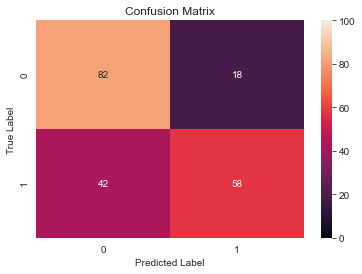

Accuracy: 0.6731818181818182
0.6731818181818182 None


In [131]:
eclf.fit(X_train, y_train)
print(eclf.score(X_test, y_test), evaluate(eclf, X_test, y_test))

0.6718181818181819
f1 Score: 0.7285714285714285


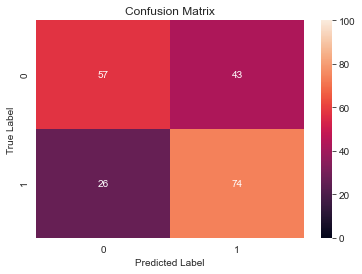

Accuracy: 0.6718181818181819
None


In [132]:
svmmodel= svm.SVC(kernel='poly', degree=4)
svmmodel.fit(X_train_under, y_train_under)
print(svmmodel.score(X_test, y_test))
print(evaluate(svmmodel, X_test, y_test))

In [133]:
scores = cross_val_score(svmmodel, X_train_under, y_train_under, cv=5)
scores.mean()

0.628906391130433

In [134]:
D_train = xgb.DMatrix(X_train, label=y_train)
D_test = xgb.DMatrix(X_test.values, label=y_test.values)

In [135]:
param = {
    'booster':'dart',
    'eta': 0.005, 
    'max_depth': 7,  
    'num_class': 2,
    'n_estimators':2000,
    'objective':'multi:softprob',
    'sample_type':'weighted',
    'normalize_type':'forest',
    'tree_method':'exact'} 


steps = 200  # The number of training iterations

In [136]:
DLmodel= tf.keras.Sequential()

DLmodel.add(tf.keras.layers.Dense(64, activation='relu'))
DLmodel.add(tf.keras.layers.Dense(128, activation='relu'))
DLmodel.add(tf.keras.layers.Dense(256, activation='relu'))
DLmodel.add(tf.keras.layers.Dense(512, activation='relu'))
DLmodel.add(tf.keras.layers.Dense(1024, activation='relu'))
DLmodel.add(tf.keras.layers.Dense(512, activation='relu'))
DLmodel.add(tf.keras.layers.Dense(256, activation='relu'))
DLmodel.add(tf.keras.layers.Dense(128, activation='relu'))
DLmodel.add(tf.keras.layers.Dense(64, activation='relu'))
DLmodel.add(tf.keras.layers.Dense(2, activation='sigmoid'))

DLmodel.compile(optimizer=tf.keras.optimizers.Adam(),
    loss="categorical_crossentropy",
    metrics=["accuracy"])

In [137]:
y_train=tf.keras.utils.to_categorical(
    y_train, num_classes=2, dtype='float32'
)

In [138]:
DLmodel.fit(X_train, y_train, epochs=10)

Epoch 1/10
275/275 [==============================] - 8s 17ms/step - loss: 1.8949 - accuracy: 0.6092
Epoch 2/10
275/275 [==============================] - 5s 17ms/step - loss: 0.6293 - accuracy: 0.6347
Epoch 3/10
275/275 [==============================] - 5s 17ms/step - loss: 0.6341 - accuracy: 0.6305
Epoch 4/10
275/275 [==============================] - 5s 17ms/step - loss: 0.6167 - accuracy: 0.6313
Epoch 5/10
275/275 [==============================] - 4s 16ms/step - loss: 0.7226 - accuracy: 0.6089
Epoch 6/10
275/275 [==============================] - 4s 16ms/step - loss: 0.6746 - accuracy: 0.5964
Epoch 7/10
275/275 [==============================] - 4s 16ms/step - loss: 0.6747 - accuracy: 0.5967
Epoch 8/10
275/275 [==============================] - 5s 18ms/step - loss: 0.6746 - accuracy: 0.5967
Epoch 9/10
275/275 [==============================] - 5s 17ms/step - loss: 0.6748 - accuracy: 0.5967 0s - loss:
Epoch 10/10
275/275 [==============================] - 4s 16ms/step - loss: 0.67

In [139]:
DLmodel.evaluate(X_test, tf.keras.utils.to_categorical(y_test, num_classes=2, dtype='float32'))

69/69 [==============================] - 0s 4ms/step - loss: 0.6743 - accuracy: 0.5968


[0.674301266670227, 0.596818208694458]